In [1]:
import numpy as np
from Problem import Problem
%load_ext autoreload
%autoreload 2

In [2]:
a = np.load("problems.npz",allow_pickle = True)
b = a['arr_0']
pairs = [(0, 0.3)]
cpt, alpha = pairs[0]
P0,P1,R1,aaa = b[cpt]
R0 = [0 for _ in range(3)]
p = Problem(3, 50, alpha, 100, PR=[P0, P1, R0, R1], tau=100, time_exp=100, repeat_times = 10)

In [3]:
P0, P1, R1, R0

(array([[0.18248579, 0.30976161, 0.5077526 ],
        [0.01078089, 0.45275026, 0.53646885],
        [0.3427577 , 0.63316582, 0.02407648]]),
 array([[0.15494619, 0.10072859, 0.74432522],
        [0.80929357, 0.00635796, 0.18434847],
        [0.36282171, 0.25907193, 0.37810635]]),
 array([0.96194151, 0.60365526, 0.29908252]),
 [0, 0, 0])

In [4]:
gain0 = R1[0]*0.3+R0[0]*0.7
gain0

0.28858245425803236

In [5]:
etat1 = P0[0,:]*0.7 + P1[0,:]*0.3
etat1

array([0.17422391, 0.2470517 , 0.57872439])

In [6]:
actifs = [etat1[0], alpha-etat1[0], 0]
actifs_210 = [0,0,0.3]
actifs

[0.1742239093396837, 0.12577609066031628, 0]

In [7]:
gain1 = actifs[0]*R1[0] + actifs[1]*R1[1]
gain_210 = actifs_210[2]*R1[2]
gain1+gain0, gain_210

(0.5321010641170578, 0.0897247552253812)

In [8]:
N = 10
p2 = Problem(3, N, alpha, 100, PR=[P0, P1, R0, R1], tau=10, time_exp=1, repeat_times = 20)
values, mean_bound, policy = p2.experiment(policy=True, joblib_id=1, debug=True)
values/N, mean_bound, policy

rho is [7.00000000e-01 4.15092226e-10 5.09858729e-10 3.00000001e-01
 1.42693774e-10 4.79272715e-11] and sums to 1.0000000013944652
t : 0
policy [0.3        0.25582172 0.08592412]
Policy recommends :  [0 1 2]
Bandits are in states :  [0 0 0 0 0 0 0 0 0 0]
Bandits number  [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.] are selected
[2.88582454]


(array([0.28858245]),
 0.28858245489949086,
 array([[0.3       , 0.25582172, 0.08592412]]))

In [9]:
N = 10
p2 = Problem(3, N, alpha, 100, PR=[P0, P1, R0, R1], tau=10, time_exp=2, repeat_times = 20)
values, mean_bound, policy = p2.experiment(policy=True, joblib_id=1, debug=True)
values/N, mean_bound, policy

rho is [7.00000000e-01 2.89301135e-12 2.49145190e-12 1.21275614e-01
 4.65672226e-12 5.78724386e-01 3.00000000e-01 1.74223909e-01
 2.28268605e-12 1.25776091e-01 1.17415692e-13 1.02028821e-13] and sums to 2.0000000000238694
t : 0
policy [0.3        0.47813576 0.02459411]
Policy recommends :  [1 0 2]
Bandits are in states :  [0 0 0 0 0 0 0 0 0 0]
Bandits number  [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.] are selected
t : 1
policy [1.00000000e+00 5.09108370e-01 1.76299501e-13]
Policy recommends :  [0 1 2]
Bandits are in states :  [2 1 2 0 2 0 1 0 2 1]
Bandits number  [0. 0. 0. 1. 0. 1. 0. 1. 0. 0.] are selected
[2.88582454 2.88582454]


(array([0.28858245, 0.28858245]),
 0.532101064126675,
 array([[3.00000000e-01, 4.78135755e-01, 2.45941138e-02],
        [1.00000000e+00, 5.09108370e-01, 1.76299501e-13]]))

10 3
time horizon 1
actives2= [10  0  0] 0 3
reward  0.2885824542580324 expected= 0.28858245425803236
20 6
time horizon 1
actives2= [20  0  0] 0 6
reward  0.2885824542580324 expected= 0.28858245425803236
30 9
time horizon 1
actives2= [30  0  0] 0 9
reward  0.28858245425803236 expected= 0.28858245425803236
40 12
time horizon 1
actives2= [40  0  0] 0 12
reward  0.2885824542580324 expected= 0.28858245425803236
50 15
time horizon 1
actives2= [50  0  0] 0 15
reward  0.2885824542580324 expected= 0.28858245425803236
60 18
time horizon 1
actives2= [60  0  0] 0 18
reward  0.28858245425803236 expected= 0.28858245425803236
70 21
time horizon 1
actives2= [70  0  0] 0 21
reward  0.28858245425803236 expected= 0.28858245425803236
80 24
time horizon 1
actives2= [80  0  0] 0 24
reward  0.2885824542580324 expected= 0.28858245425803236
90 27
time horizon 1
actives2= [90  0  0] 0 27
reward  0.2885824542580324 expected= 0.28858245425803236
100 30
time horizon 1
actives2= [100   0   0] 0 30
reward  0.288582

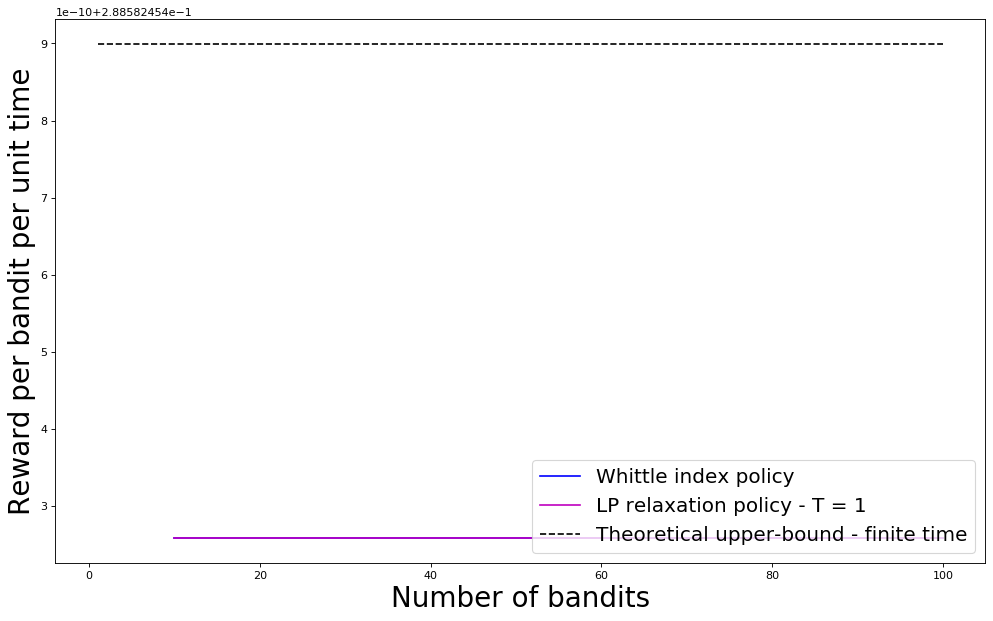

In [10]:
p2 = Problem(3, 50, alpha, 100, PR=[P0, P1, R0, R1], tau=10, time_exp=1, repeat_times = 2)
p2.plot_sim_nbbandits(whittle=True)


rho is [7.00000000e-01 6.23233950e-12 6.20445117e-02 1.09805166e-11
 8.11373057e-10 1.31590399e-11 1.44299531e-11 5.77112853e-12
 3.10039319e-03 6.83283599e-12 1.23453064e-11 1.21275614e-01
 4.06095376e-01 2.40568730e-01 4.12944358e-01 2.50621978e-01
 4.14259910e-01 2.47585283e-01 4.14506028e-01 2.45959587e-01
 2.26926882e-11 5.78724386e-01 2.31860113e-01 4.59431270e-01
 2.87055641e-01 4.49378022e-01 2.85740090e-01 4.52414717e-01
 2.82393579e-01 4.54040413e-01 3.00000000e-01 1.74223909e-01
 2.66410300e-01 1.63635338e-01 2.95780866e-01 1.52087073e-01
 2.99999998e-01 1.48889563e-01 3.00000000e-01 1.48310950e-01
 1.27403717e-11 1.25776091e-01 3.35897004e-02 1.36364662e-01
 4.21913397e-03 1.47912927e-01 1.94830104e-09 1.51110437e-01
 8.44078115e-11 1.51689050e-01 2.39298983e-12 1.84503835e-11
 5.48668884e-12 2.09788825e-11 4.73325192e-12 2.04376387e-11
 4.20890153e-12 2.46288991e-11 4.01590138e-12 1.89194062e-11] and sums to 10.000000000627127
rho is [2.68527037e-12 1.08004713e-01 4.051081

rho is [1.00000000e-01 2.65617178e-10 1.63733614e-09 1.00155765e-10
 3.00000000e-01 2.57763576e-01 4.00125158e-01 2.63010025e-01
 3.00000000e-01 4.42236424e-01 2.99874841e-01 4.36989976e-01
 3.00000000e-01 1.70794012e-01 2.85388315e-01 1.63143089e-01
 4.40800777e-10 1.29205989e-01 1.46116848e-02 1.36856911e-01
 7.95024013e-11 2.64143540e-11 1.47139086e-10 1.78849427e-10] and sums to 4.000000003039681
rho is [5.84273805e-13 1.82718463e-01 9.80452982e-13 1.72348984e-12
 4.45123462e-01 1.43394475e-01 7.00000000e-01 7.21580747e-02
 5.56605525e-01 1.15331359e-12 3.00000000e-01 1.09358940e-01
 3.00000000e-01 1.22423983e-12 1.90641060e-01 1.43865501e-12
 7.77139644e-13 1.13574640e-12] and sums to 3.000000000013031
rho is [3.00000000e-01 2.57093977e-11 4.00000000e-01 1.09789114e-01
 1.27186637e-10 5.90210886e-01 3.00000000e-01 1.05541948e-01
 1.06025411e-10 1.94458053e-01 1.04482954e-11 3.12622460e-11] and sums to 2.000000000688177
rho is [1.17161349e-11 1.00000000e-01 6.00000000e-01 1.0000000

rho is [3.00000000e-01 6.89096316e-11 2.00000000e-01 2.12267589e-01
 2.00000000e-01 4.87732411e-01 3.00000000e-01 1.71937311e-01
 3.79927600e-11 1.28062689e-01 1.69277725e-11 1.15090426e-10] and sums to 2.000000000847943
rho is [1.67937822e-15 1.00000000e-01 6.00000000e-01 2.00000000e-01
 1.00000000e-01 8.11790586e-16] and sums to 1.000000000001543
[2.88582454 2.16925203 2.88582454 2.16925203 2.88582454 2.16925203
 2.88582454 2.16925203 2.88582454 2.52753829]
rho is [2.04332015e-13 8.16196237e-02 1.67681235e-13 7.11772458e-12
 2.34994929e-13 6.13768064e-12 2.40502151e-13 3.10387329e-03
 2.15351092e-13 2.00000000e-01 3.87746152e-01 2.38902059e-01
 4.13191465e-01 2.50582641e-01 4.14268892e-01 2.47580680e-01
 4.14506577e-01 2.45957622e-01 5.00000000e-01 2.30634224e-01
 4.61097941e-01 2.86808535e-01 4.49417359e-01 2.85731108e-01
 4.52419320e-01 2.82389550e-01 4.54042378e-01 1.00000000e-01
 2.69268738e-01 1.64719102e-01 2.95625004e-01 1.52107027e-01
 3.00000000e-01 1.48886580e-01 3.00000000

rho is [2.03179030e-09 8.07803086e-09 7.62321289e-10 3.56387569e-09
 8.28269862e-10 1.67122703e-09 8.03235639e-10 3.80393562e-09
 4.86518255e-10 2.99999999e-01 3.06131182e-01 3.66367113e-01
 2.95171561e-01 3.69240002e-01 2.93456834e-01 3.70811481e-01
 2.91879477e-01 3.72417094e-01 4.00000001e-01 3.93868811e-01
 3.33632888e-01 4.04828437e-01 3.30759999e-01 4.06543165e-01
 3.29188519e-01 4.08120521e-01 3.27582907e-01 2.99999999e-01
 1.86821197e-01 2.58844046e-01 1.91719149e-01 2.59277425e-01
 1.90481838e-01 2.60656306e-01 1.89057874e-01 2.62111719e-01
 2.21736669e-09 1.13178804e-01 4.11559553e-02 1.08280853e-01
 4.07225765e-02 1.09518164e-01 3.93436954e-02 1.10942128e-01
 3.78882820e-02 4.74175457e-10 3.43913196e-10 6.00651391e-10
 3.47030745e-10 5.58245948e-10 3.30932845e-10 5.63620447e-10
 3.06793577e-10 7.48458072e-10] and sums to 9.000000029688863
rho is [2.50854597e-12 5.38698100e-11 1.83402757e-10 5.91002810e-11
 2.41613992e-10 5.42472081e-11 3.82786889e-10 5.39586400e-11
 2.000000

rho is [3.50795874e-10 6.74740305e-11 9.84818408e-11 5.79657465e-11
 2.09084150e-10 4.04688104e-11 2.28501474e-10 1.76991529e-11
 4.00000000e-01 3.10889626e-01 3.45876920e-01 3.18367456e-01
 3.45237323e-01 3.17996636e-01 3.45765519e-01 3.17435763e-01
 3.00000000e-01 3.89110374e-01 3.54123080e-01 3.81632544e-01
 3.54762677e-01 3.82003364e-01 3.54234481e-01 3.82564237e-01
 2.00000000e-01 2.19058260e-01 2.36170115e-01 2.13358047e-01
 2.37417568e-01 2.12754111e-01 2.37935856e-01 2.12239622e-01
 1.00000000e-01 8.09417403e-02 6.38298849e-02 8.66419529e-02
 6.25824319e-02 8.72458893e-02 6.20641440e-02 8.77603783e-02
 1.71583862e-11 3.17703607e-11 1.93357151e-11 3.05504250e-11
 1.92657716e-11 3.00487168e-11 1.87387053e-11 4.02311493e-11] and sums to 8.00000000149489
rho is [2.69844295e-11 2.18757072e-11 3.63101505e-02 2.37199762e-11
 5.00000000e-01 2.03652714e-01 4.19746007e-01 2.27211895e-01
 2.00000000e-01 4.96347286e-01 2.43943842e-01 4.72788105e-01
 3.00000000e-01 1.20425839e-01 3.00000000

rho is [9.84397486e-12 2.79888755e-01 7.20725835e-12 1.07850871e-09
 2.18573255e-11 6.82697580e-10 2.33055522e-11 3.18380680e-03
 1.58161967e-11 5.28210554e-11 3.47953171e-01 2.00597946e-01
 4.18870534e-01 2.49678640e-01 4.14475267e-01 2.47474936e-01
 4.14519190e-01 2.45912498e-01 7.00000000e-01 7.21580748e-02
 4.99402055e-01 2.81129465e-01 4.50321360e-01 2.85524732e-01
 4.52525064e-01 2.82297004e-01 4.54087502e-01 2.82205894e-11
 2.02829709e-01 1.89626682e-01 2.92042871e-01 1.52565667e-01
 2.99999997e-01 1.48818070e-01 3.00000000e-01 1.48293212e-01
 3.00000000e-01 9.71702914e-02 1.10373318e-01 7.95712884e-03
 1.47434333e-01 3.21369120e-09 1.51181930e-01 4.62905915e-11
 1.51706788e-01 4.36327084e-11 7.78771939e-12 2.60901834e-11
 1.03797112e-11 2.40652011e-11 9.49412881e-12 2.60164169e-11
 8.70104769e-12 2.31390334e-11] and sums to 9.000000000856446
rho is [3.08355873e-01 3.31482209e-10 2.78350191e-08 3.27592465e-10
 1.01976510e-08 4.26296939e-10 3.14919263e-03 2.51526914e-10
 1.916441

rho is [6.54248912e-13 3.50000000e-01 3.50000000e-01 1.50000000e-01
 1.50000000e-01 1.02065276e-12] and sums to 1.0000000000017935
[5.77164909 4.69679032 5.77164909 3.62193156 5.77164909 4.33850407
 5.05507658 5.77164909 5.77164909 4.69679032]
rho is [9.52968430e-12 1.93946734e-01 6.80100029e-12 6.51038998e-10
 2.11568737e-11 6.91278989e-10 2.07229052e-11 3.15304429e-03
 1.27485340e-11 4.45973223e-11 3.77897517e-01 2.15339193e-01
 4.16684958e-01 2.50026543e-01 4.14395844e-01 2.47515632e-01
 4.14514336e-01 2.45929864e-01 7.00000000e-01 1.28155750e-01
 4.84660807e-01 2.83315042e-01 4.49973457e-01 2.85604155e-01
 4.52484368e-01 2.82332620e-01 4.54070136e-01 1.00000000e-01
 2.23336991e-01 1.80041059e-01 2.93421447e-01 1.52389161e-01
 2.99999998e-01 1.48844436e-01 3.00000000e-01 1.48299754e-01
 2.00000000e-01 7.66630092e-02 1.19958941e-01 6.57855345e-03
 1.47610839e-01 2.34766492e-09 1.51155564e-01 4.12356556e-11
 1.51700246e-01 3.84453554e-11 6.94940064e-12 2.12792298e-11
 8.40510317e-12 2

rho is [1.25579045e-11 2.36917744e-01 6.52968402e-12 8.29282869e-10
 2.31698779e-11 7.96719228e-10 2.43448591e-11 3.16842557e-03
 1.53759047e-11 4.99439226e-11 3.62925344e-01 2.07968569e-01
 4.17777746e-01 2.49852592e-01 4.14435556e-01 2.47495284e-01
 4.14516763e-01 2.45921181e-01 7.00000000e-01 1.00156912e-01
 4.92031431e-01 2.82222253e-01 4.50147409e-01 2.85564444e-01
 4.52504716e-01 2.82314812e-01 4.54078819e-01 5.00000000e-02
 2.13083350e-01 1.84833870e-01 2.92732159e-01 1.52477414e-01
 2.99999997e-01 1.48831253e-01 3.00000000e-01 1.48296483e-01
 2.50000000e-01 8.69166502e-02 1.15166130e-01 7.26784104e-03
 1.47522586e-01 2.78743141e-09 1.51168747e-01 4.53815226e-11
 1.51703517e-01 4.39594957e-11 7.81792822e-12 2.48626337e-11
 1.00782053e-11 2.32623684e-11 9.11295821e-12 2.44816224e-11
 8.50221846e-12 2.21094921e-11] and sums to 9.000000000834438
rho is [1.52751775e-01 4.40208827e-12 7.45041580e-10 7.87289496e-12
 7.07087053e-10 1.70162866e-11 3.15513252e-03 1.07520221e-11
 4.472482

rho is [1.22106953e-12 3.46255677e-11 3.39387406e-12 8.68569289e-12
 2.31763954e-11 1.42614098e-11 3.00000000e-01 3.06131189e-01
 3.66367109e-01 2.95171569e-01 3.69239995e-01 2.93456843e-01
 4.00000000e-01 3.93868811e-01 3.33632891e-01 4.04828431e-01
 3.30760005e-01 4.06543157e-01 3.00000000e-01 1.86821203e-01
 2.58844040e-01 1.91719156e-01 2.59277417e-01 1.90481845e-01
 2.68457708e-11 1.13178797e-01 4.11559598e-02 1.08280844e-01
 4.07225827e-02 1.09518155e-01 1.39731966e-11 4.18013142e-11
 6.67742927e-12 4.34212963e-11 1.23459092e-11 5.94540026e-11] and sums to 6.000000001187935
rho is [1.58885796e-11 2.90962991e-11 1.69436229e-02 4.21747200e-11
 8.53931004e-03 4.50000000e-01 2.29272333e-01 4.16690273e-01
 2.38144757e-01 4.15876834e-01 2.50000000e-01 4.70727667e-01
 2.66366104e-01 4.61855243e-01 2.75583856e-01 3.00000000e-01
 1.37024680e-01 3.00000000e-01 1.45367151e-01 3.00000000e-01
 3.34172434e-11 1.62975320e-01 6.80063699e-11 1.54632850e-01
 2.37548911e-11 1.51300475e-11 4.0929219

[5.77164909 4.69679032 5.77164909 4.69679032 5.05507658 4.33850407
 5.77164909 4.33850407 5.77164909 4.33850407]
rho is [5.00000000e-02 3.27443092e-13 1.19246762e-12 1.96869097e-12
 1.29873366e-12 2.11514210e-12 1.25075062e-12 2.76171138e-12
 5.63149803e-13 1.50000000e-01 3.58806239e-01 3.15979348e-01
 3.46092200e-01 3.17355961e-01 3.46385316e-01 3.16808328e-01
 3.46980474e-01 3.16195740e-01 5.00000000e-01 3.41193761e-01
 3.84020652e-01 3.53907800e-01 3.82644039e-01 3.53614684e-01
 3.83191672e-01 3.53019526e-01 3.83804260e-01 3.00000000e-01
 2.28604129e-01 2.14016596e-01 2.37779445e-01 2.12233518e-01
 2.38489194e-01 2.11671788e-01 2.39038562e-01 2.11114732e-01
 1.84678132e-13 7.13958705e-02 8.59834041e-02 6.22205548e-02
 8.77664818e-02 6.15108062e-02 8.83282116e-02 6.09614383e-02
 8.88852680e-02 4.33748836e-13 5.07352851e-13 4.54974119e-13
 5.23894364e-13 4.76371909e-13 4.99385925e-13 5.53830177e-13
 4.73295657e-13 8.31291869e-13] and sums to 9.000000000033
rho is [5.00000025e-02 1.229

rho is [6.26887972e-13 3.23073526e-12 2.12800961e-12 2.10633903e-11
 2.62042630e-12 1.46907924e-11 2.50753931e-12 5.89819814e-12
 1.32982744e-12 2.00000000e-01 3.85369264e-01 2.88855228e-01
 3.73770916e-01 2.89113993e-01 3.75201604e-01 2.87406097e-01
 3.76980553e-01 2.85585657e-01 5.00000000e-01 3.14630736e-01
 4.11144772e-01 3.26229084e-01 4.10886007e-01 3.24798396e-01
 4.12593903e-01 3.23019447e-01 4.14414343e-01 2.50000000e-01
 2.52736254e-01 1.89407495e-01 2.62886925e-01 1.86615812e-01
 2.64627751e-01 1.85001752e-01 2.66250889e-01 1.83349086e-01
 5.00000000e-02 4.72637465e-02 1.10592505e-01 3.71130752e-02
 1.13384188e-01 3.53722488e-02 1.14998248e-01 3.37491107e-02
 1.16650914e-01 1.43094812e-12 9.42812722e-13 1.53890185e-12
 1.00908958e-12 1.49682212e-12 9.74046236e-13 1.54057716e-12
 9.66006551e-13 1.76734497e-12] and sums to 9.000000000077431
rho is [6.47416580e-02 2.39428417e-10 1.06674714e-09 2.71684089e-10
 4.09389647e-03 3.05553690e-10 4.34313451e-03 3.85258342e-01
 2.393864

rho is [3.00000000e-01 2.50950365e-12 1.91103426e-02 2.55659669e-12
 2.50000000e-01 1.86647970e-01 4.26108655e-01 2.32270859e-01
 1.50000000e-01 5.13352030e-01 2.54781002e-01 4.67729141e-01
 3.00000000e-01 1.55338470e-01 3.00000000e-01 1.41893202e-01
 7.59118422e-12 1.44661530e-01 1.46921156e-11 1.58106798e-01
 1.41055235e-12 3.40190169e-12 1.43988342e-12 3.03841433e-12] and sums to 4.0000000000599565
rho is [2.17455426e-09 1.16803411e-01 8.16819602e-10 1.00000003e-01
 4.31800441e-01 1.82102629e-01 5.99999999e-01 1.51396153e-01
 5.17897374e-01 5.00000011e-02 3.00000004e-01 1.24346208e-01
 2.50000000e-01 1.12591500e-10 1.75653795e-01 3.19090088e-09
 7.70890577e-10 1.82758648e-09] and sums to 3.000000025314858
[5.77164909 4.69679032 5.77164909 4.69679032 5.77164909 3.62193156
 5.77164909 3.98021781 5.05507658 5.41336283]
rho is [1.50000037e-01 9.89113222e-10 2.89432744e-08 9.71705481e-10
 3.34071792e-03 1.02392473e-09 2.99999964e-01 2.33579793e-01
 4.17004129e-01 2.46929299e-01 4.1462112

rho is [1.66666667e-01 9.54696658e-14 5.47285748e-02 6.29510082e-14
 4.33333333e-01 1.57199518e-01 4.27694650e-01 2.14230519e-01
 1.00000000e-01 5.42800482e-01 2.17576775e-01 4.85769481e-01
 3.00000000e-01 1.15845642e-01 3.00000000e-01 1.35658086e-01
 4.79579833e-12 1.84154358e-01 2.10155298e-13 1.64341914e-01
 4.46746851e-14 2.49625887e-13 1.18101261e-13 2.23502876e-13] and sums to 4.000000000003605
rho is [1.21162827e-11 6.22744635e-02 1.11130456e-11 1.00000000e-01
 4.39664658e-01 2.04447412e-01 6.00000000e-01 1.98060878e-01
 4.95552588e-01 1.33333333e-01 3.00000000e-01 1.30474927e-01
 1.66666667e-01 7.12536055e-11 1.69525073e-01 1.43467234e-11
 7.22407280e-12 1.28881413e-11] and sums to 3.0000000001884564
rho is [6.66666667e-02 2.34520550e-13 3.66666667e-01 2.39726622e-01
 2.66666667e-01 4.60273378e-01 3.00000000e-01 1.54004621e-01
 1.39670670e-12 1.45995379e-01 1.55971690e-13 5.33190003e-13] and sums to 2.000000000004122
[8.65747363 7.22432861 8.65747363 6.86604236 8.65747363 6.507

rho is [6.77142909e-12 1.36652054e-01 8.82384574e-12 6.78605426e-10
 1.76683587e-11 4.07109759e-10 1.43494598e-11 3.13253566e-03
 9.43536993e-12 3.93712384e-11 3.97860414e-01 2.25166692e-01
 4.15227906e-01 2.50258479e-01 4.14342895e-01 2.47542762e-01
 4.14511100e-01 2.45941442e-01 7.00000000e-01 1.65487533e-01
 4.74833308e-01 2.84772093e-01 4.49741521e-01 2.85657105e-01
 4.52457238e-01 2.82356365e-01 4.54058558e-01 1.66666667e-01
 2.37008512e-01 1.73650644e-01 2.94340496e-01 1.52271491e-01
 2.99999998e-01 1.48862014e-01 3.00000000e-01 1.48304115e-01
 1.33333333e-01 6.29914881e-02 1.26349356e-01 5.65950375e-03
 1.47728509e-01 1.95992427e-09 1.51137986e-01 3.92592425e-11
 1.51695885e-01 3.34456411e-11 5.72924924e-12 1.76889343e-11
 6.23508684e-12 1.66317730e-11 5.71119349e-12 1.78540621e-11
 5.48470865e-12 1.57884869e-11] and sums to 9.000000000571319
rho is [8.18916808e-11 2.80504708e-02 9.50307688e-11 1.50986654e-10
 1.12258061e-10 3.79164366e-03 8.88150610e-11 1.33333333e-01
 4.194771

rho is [1.75348011e-10 6.11194307e-11 2.33333333e-01 4.14954247e-01
 4.66666667e-01 2.85045753e-01 1.66666667e-01 2.96199309e-01
 1.33333334e-01 3.80069151e-03 3.83090270e-11 6.48798191e-11] and sums to 2.0000000006487624
[8.65747363 8.65747363 6.5077561  8.65747363 8.65747363 8.29918737
 6.86604236 8.65747363 7.22432861 8.29918737]
rho is [3.61512719e-12 1.09135839e-01 2.87386203e-12 6.53623427e-11
 6.30220334e-12 1.95781640e-10 6.16343461e-12 3.11820457e-03
 3.86833939e-12 1.00000000e-01 3.92803283e-01 2.32034375e-01
 4.14209686e-01 2.50420560e-01 4.14305894e-01 2.47561721e-01
 4.14508838e-01 2.45949532e-01 6.00000000e-01 1.98060878e-01
 4.67965625e-01 2.85790314e-01 4.49579440e-01 2.85694106e-01
 4.52438279e-01 2.82372957e-01 4.54050468e-01 1.33333333e-01
 2.53138625e-01 1.69184873e-01 2.94982750e-01 1.52189259e-01
 2.99999999e-01 1.48874296e-01 3.00000000e-01 1.48307162e-01
 1.66666667e-01 4.68613754e-02 1.30815127e-01 5.01724958e-03
 1.47810741e-01 8.84099126e-10 1.51125704e-01 1.

rho is [6.65036339e-12 8.82846391e-12 9.70875017e-12 3.66666667e-01
 2.90637589e-01 3.74485221e-01 3.33333333e-01 4.09362411e-01
 3.25514779e-01 2.66666667e-01 1.86500994e-01 2.64197084e-01
 3.33333333e-02 1.13499006e-01 3.58029163e-02 1.13844961e-11
 6.11487385e-12 1.27348755e-11] and sums to 3.0000000001600835
rho is [3.81530315e-10 1.80108867e-02 2.33333340e-01 4.15609251e-01
 4.66666664e-01 2.66379867e-01 1.33333336e-01 3.00000000e-01
 1.66666663e-01 2.90510249e-09 5.21632961e-09 1.42425127e-09] and sums to 2.0000000174409154
rho is [3.50579758e-10 3.66666670e-01 3.33333331e-01 2.66666668e-01
 3.33333312e-02 3.19978591e-09] and sums to 1.0000000036762107
[8.65747363 8.65747363 7.22432861 7.58261486 7.22432861 8.65747363
 7.22432861 8.29918737 6.86604236 8.29918737]
rho is [2.60787412e-01 7.25632767e-12 3.99879109e-10 8.53687963e-12
 4.90783607e-10 1.44148911e-11 3.16205491e-03 8.85296991e-12
 3.05879255e-01 2.11021596e-01 4.17325096e-01 2.49924645e-01
 4.14419107e-01 2.47503712e-01

rho is [2.24275209e-14 2.00000000e-01 5.00000000e-01 2.33333333e-01
 6.66666667e-02 2.27855228e-13] and sums to 1.0000000000026221
[8.65747363 6.5077561  8.65747363 6.5077561  7.94090112 6.86604236
 8.65747363 6.86604236 8.65747363 7.94090112]
rho is [1.42508943e-08 3.91211536e-10 1.47488514e-09 1.04123536e-09
 2.63775109e-09 8.53143155e-10 2.78594540e-09 3.56558145e-10
 4.33333320e-01 2.75143998e-01 3.82603321e-01 2.80857104e-01
 3.83515830e-01 2.78939001e-01 3.85617443e-01 2.76773498e-01
 2.66666668e-01 4.24856004e-01 3.17396679e-01 4.19142897e-01
 3.16484169e-01 4.21061000e-01 3.14382556e-01 4.23226503e-01
 2.33333320e-01 1.86180799e-01 2.69550117e-01 1.79323617e-01
 2.72140475e-01 1.77325691e-01 2.74084578e-01 1.75355886e-01
 6.66666813e-02 1.13819203e-01 3.04498850e-02 1.20676384e-01
 2.78595265e-02 1.22674310e-01 2.59154233e-02 1.24644115e-01
 3.69681835e-10 5.78858248e-10 4.85462722e-10 5.59654096e-10
 4.47802289e-10 5.78334108e-10 3.93846827e-10 7.92542341e-10] and sums to 8.00

rho is [6.66666667e-02 5.36189390e-13 4.10953165e-02 7.70103076e-13
 4.66666667e-01 1.88487385e-01 4.22518033e-01 2.23477059e-01
 1.66666667e-01 5.11512615e-01 2.36386650e-01 4.76522941e-01
 3.00000000e-01 1.20806939e-01 3.00000000e-01 1.39561631e-01
 6.15306131e-11 1.79193061e-01 2.94206309e-12 1.60438369e-01
 4.71065800e-13 1.92695929e-12 9.10992350e-13 1.75664951e-12] and sums to 4.000000000028776
rho is [1.00828631e-12 7.30201491e-02 6.89829563e-13 1.33333333e-01
 4.30505118e-01 2.03943259e-01 5.66666667e-01 1.96474733e-01
 4.96056741e-01 1.00000000e-01 3.00000000e-01 1.31793450e-01
 2.00000000e-01 3.53133990e-12 1.68206550e-01 1.36824977e-12
 6.59262510e-13 1.15315292e-12] and sums to 3.000000000015319
rho is [6.66666667e-02 3.71639388e-13 4.66666667e-01 1.88487385e-01
 1.66666667e-01 5.11512615e-01 3.00000000e-01 1.20806939e-01
 2.19057780e-12 1.79193061e-01 2.15249084e-13 6.64195496e-13] and sums to 2.0000000000055613
rho is [3.95633766e-12 1.66666667e-01 5.33333333e-01 6.666666

rho is [2.45537113e-09 9.48317256e-02 6.46566592e-10 1.33333338e-01
 4.27359434e-01 1.95005350e-01 5.66666666e-01 1.77808846e-01
 5.04994656e-01 6.66666695e-02 3.00000005e-01 1.29341965e-01
 2.33333333e-01 4.83973037e-10 1.70658039e-01 5.02986729e-09
 1.46825364e-09 3.32667097e-09] and sums to 3.0000000409773775
rho is [2.00000000e-01 3.85514196e-11 3.33333333e-01 1.92316218e-01
 1.66666667e-01 5.07683782e-01 3.00000000e-01 1.43700926e-01
 4.06457871e-11 1.56299074e-01 2.09925953e-11 1.38006086e-10] and sums to 2.0000000010810104
rho is [4.31354255e-10 2.33333333e-01 4.66666667e-01 1.33333333e-01
 1.66666667e-01 2.01714605e-11] and sums to 1.0000000009547514
[8.65747363 5.43289734 8.65747363 6.5077561  8.65747363 6.5077561
 8.65747363 6.14946985 8.65747363 6.86604236]
rho is [2.51045060e-01 8.58560124e-12 5.83813267e-10 1.07277601e-11
 8.02120124e-10 2.12786578e-11 3.17071300e-03 1.33166419e-11
 3.48954940e-01 2.06872488e-01 4.17940254e-01 2.49826723e-01
 4.14441461e-01 2.47492258e-01 

rho is [9.43422318e-12 5.11285176e-02 1.50000001e-01 4.29857458e-01
 5.50000000e-01 2.19014025e-01 1.25000000e-01 3.00000000e-01
 1.75000000e-01 6.07359031e-10 5.30090315e-10 1.35345640e-10] and sums to 2.000000002412339
rho is [1.27109389e-10 4.75000002e-01 2.24999999e-01 2.50000001e-01
 4.99999990e-02 1.54109241e-09] and sums to 1.0000000019502868
[11.54329817 11.18501192 10.82672566 10.46843941  9.7518669  11.18501192
  9.7518669  11.54329817  9.03529439 10.82672566]
rho is [1.01808688e-12 8.07712796e-02 9.28412565e-13 1.31995747e-12
 1.69411751e-12 5.02663002e-11 1.64539548e-12 3.10693131e-03
 1.07257271e-12 1.25000000e-01 3.99025087e-01 2.37436608e-01
 4.13408737e-01 2.50548056e-01 4.14276788e-01 2.47576634e-01
 4.14507060e-01 2.45955896e-01 5.75000000e-01 2.20203634e-01
 4.62563392e-01 2.86591263e-01 4.49451944e-01 2.85723212e-01
 4.52423366e-01 2.82386009e-01 4.54044104e-01 1.50000000e-01
 2.62297974e-01 1.65672025e-01 2.95487958e-01 1.52124574e-01
 3.00000000e-01 1.48883959e-01

rho is [5.00000001e-02 1.19975970e-12 3.02157612e-02 1.55895477e-12
 4.50000000e-01 2.05088526e-01 4.20297160e-01 2.29877199e-01
 2.00000000e-01 4.94911474e-01 2.49487079e-01 4.70122801e-01
 3.00000000e-01 1.29011085e-01 3.00000000e-01 1.42042597e-01
 6.80952016e-11 1.70988915e-01 7.37665977e-12 1.57957403e-01
 8.88006767e-13 3.02295996e-12 1.40613243e-12 2.76594180e-12] and sums to 4.0000000000473035
rho is [3.57814677e-11 4.28290973e-02 3.16837160e-11 1.75000000e-01
 4.25347069e-01 2.21188895e-01 5.25000000e-01 2.31823834e-01
 4.78811105e-01 1.25000000e-01 3.00000000e-01 1.38344581e-01
 1.75000000e-01 2.17037306e-10 1.61655420e-01 5.18897579e-11
 2.03022570e-11 3.70455889e-11] and sums to 3.0000000005389307
[11.54329817  9.03529439 11.54329817  9.03529439 11.54329817  9.03529439
 11.54329817  9.03529439 10.82672566  9.39358064]
rho is [2.73558618e-10 1.00701744e-08 6.22089109e-10 1.78661941e-09
 7.90760264e-10 8.35312483e-10 7.71226749e-10 1.54492314e-09
 3.84179031e-10 2.00000001e-0

rho is [3.81790485e-10 1.84842342e-10 9.09669634e-10 1.72761606e-10
 5.87604445e-10 7.52564090e-11 3.50000000e-01 3.08510408e-01
 3.56122014e-01 3.06769513e-01 3.57238658e-01 3.05726740e-01
 3.50000000e-01 3.91489592e-01 3.43877986e-01 3.93230487e-01
 3.42761341e-01 3.94273260e-01 2.50000000e-01 2.02939731e-01
 2.47507077e-01 2.02538602e-01 2.48347492e-01 2.01617979e-01
 5.00000004e-02 9.70602689e-02 5.24929232e-02 9.74613981e-02
 5.16525084e-02 9.83820213e-02 6.38641597e-11 8.54154371e-11
 6.39362551e-11 8.51038599e-11 6.11026341e-11 1.16812815e-10] and sums to 6.0000000032403635
rho is [7.02299406e-12 9.63141570e-03 5.64787463e-12 2.96333334e-03
 5.83304212e-12 2.75000000e-01 4.07305513e-01 2.46490176e-01
 4.14775801e-01 2.45887650e-01 4.25000000e-01 2.83063071e-01
 4.53509824e-01 2.82260866e-01 4.54112350e-01 1.25000000e-01
 3.00000000e-01 1.49654615e-01 3.00000000e-01 1.48243359e-01
 1.75000000e-01 2.12738708e-10 1.50345385e-01 1.60239767e-11
 1.51756641e-01 1.05288351e-11 3.802585

rho is [7.63659620e-14 3.78002694e-02 8.92858371e-14 4.24605221e-13
 1.21735642e-13 1.60341913e-12 1.13765845e-13 3.09154983e-03
 8.29953411e-14 1.25000000e-01 4.13997260e-01 2.44807232e-01
 4.12315948e-01 2.50722007e-01 4.14237076e-01 2.47596982e-01
 4.14504633e-01 2.45964579e-01 5.75000000e-01 2.48202471e-01
 4.55192768e-01 2.87684052e-01 4.49277993e-01 2.85762924e-01
 4.52403018e-01 2.82403817e-01 4.54035421e-01 2.00000000e-01
 2.72551615e-01 1.60879213e-01 2.96177245e-01 1.52036321e-01
 3.00000000e-01 1.48897142e-01 3.00000000e-01 1.48312831e-01
 1.00000000e-01 2.74483854e-02 1.39120787e-01 3.82275479e-03
 1.47963679e-01 4.35873133e-13 1.51102858e-01 6.44773315e-13
 1.51687169e-01 1.25164791e-13 4.84415446e-14 1.31043785e-13
 5.05840913e-14 1.27488261e-13 4.95242506e-14 1.32202170e-13
 4.84488200e-14 1.19412468e-13] and sums to 9.000000000005308
rho is [4.91524309e-02 1.80130898e-11 2.83910876e-10 3.51309563e-11
 6.01366938e-10 3.61049160e-11 3.09279947e-03 3.23106050e-11
 4.008475

[11.54329817  9.39358064 11.54329817 10.11015315 11.54329817 10.46843941
 10.82672566 10.82672566 10.46843941  9.39358064]
rho is [6.42787488e-12 8.73675524e-02 6.67946255e-12 4.54344982e-10
 1.22066952e-11 2.67833306e-10 1.09208264e-11 3.11153276e-03
 6.82613492e-12 7.50000000e-02 4.04049014e-01 2.35231204e-01
 4.13735715e-01 2.50496007e-01 4.14288669e-01 2.47570547e-01
 4.14507786e-01 2.45953298e-01 6.25000000e-01 2.08583434e-01
 4.64768796e-01 2.86264285e-01 4.49503993e-01 2.85711331e-01
 4.52429453e-01 2.82380681e-01 4.54046702e-01 1.75000000e-01
 2.55941857e-01 1.67106108e-01 2.95281712e-01 1.52150982e-01
 2.99999999e-01 1.48880015e-01 3.00000000e-01 1.48308581e-01
 1.25000000e-01 4.40581430e-02 1.32893892e-01 4.71828850e-03
 1.47849018e-01 1.28711201e-09 1.51119985e-01 4.06942638e-11
 1.51691419e-01 1.13364673e-11 4.07136787e-12 1.19986445e-11
 4.38606432e-12 1.13637685e-11 4.11292002e-12 1.16713873e-11
 4.03596162e-12 1.08761759e-11] and sums to 9.000000000406343
rho is [2.02184

rho is [6.37000966e-12 3.47698332e-02 9.22024204e-12 1.92850173e-02
 8.25846348e-12 1.50000000e-01 4.32216724e-01 2.21567010e-01
 4.18111670e-01 2.36283967e-01 5.50000000e-01 2.33013443e-01
 4.78432990e-01 2.62603312e-01 4.63716033e-01 1.50000000e-01
 3.00000000e-01 1.37355688e-01 3.00000000e-01 1.44520020e-01
 1.50000000e-01 3.48245200e-10 1.62644312e-01 3.08954950e-11
 1.55479980e-01 1.29163740e-11 4.18676351e-12 1.09247038e-11
 4.88048703e-12 1.00721514e-11] and sums to 5.000000000216495
rho is [1.47286404e-10 2.07656880e-11 4.75000000e-01 2.30461942e-01
 2.25000000e-01 4.69538058e-01 2.75000000e-01 1.45083945e-01
 2.50000002e-02 1.54916056e-01 1.27583725e-11 2.45786468e-11] and sums to 2.00000000022446
rho is [4.96993192e-13 1.75000000e-01 5.25000000e-01 1.25000000e-01
 1.75000000e-01 3.35129329e-13] and sums to 1.0000000000009637
[11.54329817  9.03529439 11.54329817  9.39358064 11.18501192  9.39358064
 11.54329817  9.39358064 11.18501192  9.03529439]
rho is [6.85003882e-02 5.33656

rho is [9.14282228e-11 5.15000247e-10 6.39634882e-11 3.50000000e-01
 3.78507500e-01 2.74453623e-01 3.50000000e-01 3.21492499e-01
 4.25546377e-01 1.25000000e-01 2.84733154e-01 1.70748353e-01
 1.75000000e-01 1.52668463e-02 1.29251647e-01 9.78342450e-11
 4.17593399e-11 7.81577536e-11] and sums to 3.0000000011222085
rho is [5.58483146e-11 1.62071576e-09 3.25000002e-01 3.63318473e-01
 3.75000001e-01 3.36681528e-01 1.75000002e-01 2.60315205e-01
 1.25000000e-01 3.96847966e-02 8.69432704e-10 1.53222764e-09] and sums to 2.000000012634954
rho is [3.81288087e-13 2.25000000e-01 4.75000000e-01 2.00000000e-01
 1.00000000e-01 5.69483930e-13] and sums to 1.0000000000010627
[11.54329817  9.03529439 11.18501192  9.39358064 11.54329817  9.03529439
 10.82672566  9.03529439  9.7518669  10.11015315]
rho is [6.61893575e-12 1.08853058e-01 5.81978964e-12 3.73502945e-10
 1.22797416e-11 3.26525277e-10 1.14902180e-11 3.11922356e-03
 7.05412925e-12 7.50000000e-02 3.96562928e-01 2.31545892e-01
 4.14282109e-01 2.504

rho is [5.47748917e-12 1.80749298e-02 7.07240377e-12 9.59631770e-03
 5.81202854e-12 2.20000000e-01 4.18643928e-01 2.36596533e-01
 4.16077841e-01 2.42012279e-01 4.80000000e-01 2.63281142e-01
 4.63403467e-01 2.74325842e-01 4.57987721e-01 1.40000000e-01
 3.00000000e-01 1.44537266e-01 3.00000000e-01 1.46748030e-01
 1.60000000e-01 2.43542028e-10 1.55462734e-01 3.36201585e-11
 1.53251970e-01 9.41548431e-12 3.20322133e-12 8.34153744e-12
 3.68931020e-12 7.48170960e-12] and sums to 5.000000000164684
rho is [2.45343552e-10 6.93781077e-12 5.32370623e-03 7.27380403e-12
 4.20000000e-01 2.44644104e-01 4.14856832e-01 2.44704474e-01
 2.80000000e-01 4.55355896e-01 2.79819462e-01 4.55295526e-01
 3.00000000e-01 1.46983985e-01 3.00000000e-01 1.47838157e-01
 2.49757386e-10 1.53016015e-01 4.39259255e-11 1.52161843e-01
 4.07746701e-12 9.60467666e-12 4.05982377e-12 8.55330684e-12] and sums to 4.0000000001698055
rho is [9.90933022e-12 5.77200227e-02 8.95415391e-12 1.40000000e-01
 4.31189761e-01 2.10992759e-01 

[14.42912271 12.9959777  14.07083646 12.27940519 14.42912271 12.63769144
 13.7125502  11.20454642 14.07083646 10.84626017]
rho is [9.25157054e-13 1.34727393e-02 1.03462737e-12 4.26680123e-12
 1.19399104e-12 3.49305613e-03 1.01411527e-12 1.60000000e-01
 4.20391057e-01 2.46181369e-01 4.15273675e-01 2.47065837e-01
 4.14567984e-01 2.45737920e-01 5.40000000e-01 2.66136204e-01
 4.53818631e-01 2.84726325e-01 4.52934163e-01 2.81938960e-01
 4.54262080e-01 2.00000000e-01 2.85259956e-01 1.54339970e-01
 3.00000000e-01 1.48553015e-01 3.00000000e-01 1.48227449e-01
 1.00000000e-01 1.47400438e-02 1.45660030e-01 2.75906531e-11
 1.51446985e-01 7.31621647e-12 1.51772551e-01 1.46933560e-12
 5.68125485e-13 1.47699721e-12 5.77633121e-13 1.40365227e-12
 5.78113477e-13 1.26696244e-12] and sums to 7.000000000043107
rho is [3.88114016e-02 2.49046632e-10 1.56918469e-10 3.93258154e-10
 4.32715126e-03 3.03919758e-10 4.41188599e-01 2.36748562e-01
 4.17427119e-01 2.45962432e-01 4.14699587e-01 2.45267058e-01
 2.20000

rho is [1.73553692e-01 6.30464454e-13 2.66017857e-12 7.95598909e-13
 4.96151800e-11 1.25518421e-12 3.12782288e-03 8.40700727e-13
 3.26446308e-01 2.27425812e-01 4.14892964e-01 2.50311794e-01
 4.14330725e-01 2.47548997e-01 4.14510356e-01 2.45944102e-01
 2.00000000e-01 4.72574188e-01 2.85107036e-01 4.49688206e-01
 2.85669275e-01 4.52451003e-01 2.82361821e-01 4.54055898e-01
 2.66446308e-01 1.72181630e-01 2.94551767e-01 1.52244439e-01
 3.00000000e-01 1.48866053e-01 3.00000000e-01 1.48305117e-01
 3.35536917e-02 1.27818370e-01 5.44823326e-03 1.47755561e-01
 1.20293630e-10 1.51133947e-01 4.16924450e-12 1.51694883e-01
 4.17197741e-13 1.35716768e-12 5.60186013e-13 1.24172575e-12
 5.72968467e-13 1.23990221e-12 5.27670375e-13 1.17206156e-12] and sums to 8.000000000044171
rho is [1.62536617e-12 1.43003866e-02 1.65041872e-12 4.36954902e-11
 1.75142822e-12 3.38163531e-03 1.76485286e-12 2.20000000e-01
 4.11218937e-01 2.47441428e-01 4.14986011e-01 2.47213234e-01
 4.14550404e-01 2.45800819e-01 4.8000000

rho is [2.87328407e-01 2.10107764e-12 1.05505753e-11 2.19229097e-12
 6.98320140e-03 2.23989666e-12 2.52671593e-01 2.06711286e-01
 4.24284441e-01 2.42448789e-01 4.15118674e-01 2.43767650e-01
 1.60000000e-01 4.93288714e-01 2.75715559e-01 4.57551211e-01
 2.77898124e-01 4.56232350e-01 2.72671593e-01 1.74364735e-01
 3.00000000e-01 1.45561649e-01 3.00000000e-01 1.47485261e-01
 2.73284072e-02 1.25635265e-01 5.89942786e-11 1.54438351e-01
 1.30020152e-11 1.52514739e-01 1.21717388e-12 3.18446498e-12
 1.25327584e-12 3.00805959e-12 1.25952537e-12 2.66096179e-12] and sums to 6.0000000000810765
rho is [5.39617723e-12 3.13540025e-02 7.43290395e-12 1.59163697e-02
 6.49932096e-12 1.80000000e-01 4.25860551e-01 2.26476020e-01
 4.17476805e-01 2.38238602e-01 5.20000000e-01 2.42785447e-01
 4.73523980e-01 2.66606826e-01 4.61761398e-01 1.40000000e-01
 3.00000000e-01 1.40013252e-01 3.00000000e-01 1.45270680e-01
 1.60000000e-01 2.83632677e-10 1.59986748e-01 2.73504864e-11
 1.54729320e-01 1.01834447e-11 3.397789

rho is [1.40000004e-01 1.50753531e-10 3.99999997e-01 1.87177297e-01
 1.60000001e-01 5.12822704e-01 2.99999997e-01 1.31185457e-01
 3.87914321e-09 1.68814544e-01 7.98657794e-11 3.84425824e-10] and sums to 2.0000000032077994
rho is [2.60091889e-12 1.20000000e-01 5.80000000e-01 1.00000000e-01
 2.00000000e-01 1.21505825e-14] and sums to 1.0000000000041906
[14.42912271 12.63769144 14.07083646 12.63769144 14.42912271 10.84626017
 14.42912271 10.48797392 14.42912271 10.84626017]
rho is [9.44617605e-02 1.57658009e-12 1.31306672e-10 3.38030357e-12
 2.19975400e-10 5.01744634e-12 3.12752863e-03 3.28426869e-12
 4.45538239e-01 2.27566461e-01 4.14872111e-01 2.50315114e-01
 4.14329966e-01 2.47549386e-01 4.14510310e-01 2.45944268e-01
 1.60000000e-01 4.72433539e-01 2.85127889e-01 4.49684886e-01
 2.85670033e-01 4.52450614e-01 2.82362162e-01 4.54055732e-01
 2.25538239e-01 1.72090173e-01 2.94564919e-01 1.52242756e-01
 2.99999999e-01 1.48866305e-01 3.00000000e-01 1.48305180e-01
 7.44617605e-02 1.27909827e-0

rho is [2.00000001e-02 4.80040116e-12 9.69918601e-12 9.74524163e-12
 8.23278925e-12 5.05655183e-12 3.80000000e-01 2.55466276e-01
 4.08994339e-01 2.53005178e-01 4.12069403e-01 2.49785024e-01
 3.00000000e-01 4.44533724e-01 2.91005661e-01 4.46994822e-01
 2.87930597e-01 4.50214976e-01 3.00000000e-01 1.57057619e-01
 2.95139340e-01 1.53818169e-01 2.98076093e-01 1.50875663e-01
 1.05928522e-10 1.42942381e-01 4.86066042e-03 1.46181831e-01
 1.92390727e-03 1.49124337e-01 3.23265533e-12 5.08474640e-12
 4.59032859e-12 5.40364168e-12 4.11005121e-12 7.26957207e-12] and sums to 6.000000000202803
rho is [2.13083208e-10 4.00449184e-10 2.11216001e-10 1.12196027e-09
 9.98648469e-11 3.20000000e-01 3.63080551e-01 2.96934358e-01
 3.67674235e-01 2.95020346e-01 3.80000000e-01 3.36919449e-01
 4.03065642e-01 3.32325764e-01 4.04979654e-01 1.80000000e-01
 2.58703352e-01 1.92902276e-01 2.57918040e-01 1.91891146e-01
 1.20000000e-01 4.12966478e-02 1.07097725e-01 4.20819604e-02
 1.08108854e-01 1.23288525e-10 7.6945741

rho is [8.48072305e-11 5.29807531e-02 8.72067757e-11 1.44246744e-10
 9.93923398e-11 4.10971709e-03 9.18741889e-11 1.80000000e-01
 4.04233800e-01 2.39207537e-01 4.16865755e-01 2.46250068e-01
 4.14665283e-01 2.45389801e-01 5.20000000e-01 2.42785447e-01
 4.60792463e-01 2.83134246e-01 4.53749932e-01 2.81225000e-01
 4.54610200e-01 1.40000000e-01 2.78373249e-01 1.57878079e-01
 2.99999999e-01 1.48024483e-01 3.00000000e-01 1.48096315e-01
 1.60000000e-01 2.16267509e-02 1.42121921e-01 1.60591058e-09
 1.51975518e-01 7.34404578e-10 1.51903685e-01 1.31698466e-10
 5.09796783e-11 1.30513179e-10 5.20939551e-11 1.23285190e-10
 5.25402365e-11 1.09895252e-10] and sums to 7.000000003897375
rho is [3.26496523e-02 1.76016571e-10 1.48694317e-10 2.77502701e-10
 4.56374904e-03 2.19682962e-10 4.67350348e-01 2.34072871e-01
 4.18037963e-01 2.45649440e-01 4.14736920e-01 2.45133491e-01
 2.00000000e-01 4.65927130e-01 2.81962037e-01 4.54350561e-01
 2.80699331e-01 4.54866509e-01 2.47350348e-01 1.60483107e-01
 2.999999

rho is [2.28569000e-10 1.42932721e-10 6.01128316e-10 1.30901167e-10
 5.19093689e-10 5.33170474e-11 3.60000000e-01 3.08986251e-01
 3.54072995e-01 3.09089101e-01 3.54838391e-01 3.08180719e-01
 3.40000000e-01 3.91013749e-01 3.45927004e-01 3.90910899e-01
 3.45161608e-01 3.91819281e-01 2.40000000e-01 2.06163437e-01
 2.45239685e-01 2.04702491e-01 2.46161507e-01 2.03845205e-01
 6.00000003e-02 9.38365632e-02 5.47603153e-02 9.52975092e-02
 5.38384929e-02 9.61547950e-02 4.57070255e-11 6.59282445e-11
 4.72573039e-11 6.52262555e-11 4.51819084e-11 8.95328440e-11] and sums to 6.000000002413479
rho is [1.53781374e-10 3.41734954e-10 1.76880765e-10 8.34144787e-10
 8.57701026e-11 2.80000000e-01 3.72376711e-01 2.92063491e-01
 3.71968578e-01 2.90737591e-01 4.20000000e-01 3.27623289e-01
 4.07936509e-01 3.28031421e-01 4.09262409e-01 2.00000000e-01
 2.58895477e-01 1.89690450e-01 2.61636705e-01 1.88032225e-01
 1.00000000e-01 4.11045228e-02 1.10309551e-01 3.83632952e-02
 1.11967775e-01 8.53751173e-11 6.4318741

rho is [1.51530835e-13 4.74436432e-02 1.63490697e-13 6.02976310e-13
 2.40896952e-13 6.26770947e-12 2.31546831e-13 3.09462818e-03
 1.58461090e-13 1.33333333e-01 4.09416895e-01 2.43332143e-01
 4.12534649e-01 2.50687194e-01 4.14245024e-01 2.47592910e-01
 4.14505118e-01 2.45962842e-01 5.66666667e-01 2.43139462e-01
 4.56667857e-01 2.87465351e-01 4.49312806e-01 2.85754976e-01
 4.52407090e-01 2.82400253e-01 4.54037158e-01 1.83333333e-01
 2.71047557e-01 1.61838402e-01 2.96039298e-01 1.52053983e-01
 3.00000000e-01 1.48894503e-01 3.00000000e-01 1.48312176e-01
 1.16666667e-01 2.89524429e-02 1.38161598e-01 3.96070236e-03
 1.47946017e-01 4.79844548e-13 1.51105497e-01 1.20888127e-12
 1.51687824e-01 2.38091137e-13 9.18662485e-14 2.48126945e-13
 9.80665017e-14 2.40828267e-13 9.51331480e-14 2.46642936e-13
 9.28382791e-14 2.26506772e-13] and sums to 9.000000000009223
rho is [1.05814978e-09 1.56115520e-10 3.70542624e-10 1.66083714e-10
 7.71579213e-10 1.17968760e-10 6.56152263e-10 5.77821054e-11
 3.999999

rho is [3.47898829e-12 1.02147083e-11 1.67877705e-12 3.33333333e-01
 3.54382064e-01 3.05091451e-01 3.66666667e-01 3.45617936e-01
 3.94908549e-01 1.83333333e-01 2.52095837e-01 2.00113582e-01
 1.16666667e-01 4.79041630e-02 9.98864179e-02 3.39399568e-12
 1.37634833e-12 2.70414890e-12] and sums to 3.000000000035172
rho is [1.20832812e-14 2.55005425e-13 2.83333333e-01 3.61335791e-01
 4.16666667e-01 3.38664209e-01 2.16666667e-01 2.46883098e-01
 8.33333333e-02 5.31169017e-02 9.50307386e-14 2.76733876e-13] and sums to 2.0000000000017337
rho is [2.92727749e-12 3.83333333e-01 3.16666667e-01 2.33333333e-01
 6.66666666e-02 6.40634485e-11] and sums to 1.000000000089726
[17.31494726 14.80694348 16.24008849 14.44865722 17.31494726 15.88180224
 16.59837475 14.80694348 15.52351598 15.88180224]
rho is [7.76219676e-12 1.62033005e-01 3.72267920e-12 7.35371676e-12
 1.11104425e-11 4.47297995e-10 1.27718832e-11 3.13564455e-03
 8.12653953e-12 1.33333333e-01 3.69491100e-01 2.23677147e-01
 4.15448751e-01 2.5022

rho is [5.39616694e-14 2.75107722e-13 3.16666667e-01 3.44256045e-01
 3.83333333e-01 3.55743955e-01 2.16666667e-01 2.35817204e-01
 8.33333333e-02 6.41827955e-02 1.60769693e-13 2.82338946e-13] and sums to 2.000000000001966
rho is [5.82612497e-10 3.66666668e-01 3.33333333e-01 3.00000001e-01
 1.22781531e-10 1.34146438e-09] and sums to 1.0000000044081672
[17.31494726 13.37379846 17.31494726 12.65722595 17.31494726 13.37379846
 17.31494726 15.52351598 15.52351598 17.31494726]
rho is [2.70660560e-12 4.22040509e-13 1.78852013e-12 9.62546146e-13
 7.30948638e-13 9.99697073e-13 1.21121867e-12 2.95100460e-13
 4.16666667e-01 2.55685024e-01 4.07796602e-01 2.54369947e-01
 4.10655994e-01 2.51230231e-01 4.13892080e-01 2.47923582e-01
 2.83333333e-01 4.44314976e-01 2.92203398e-01 4.45630053e-01
 2.89344006e-01 4.48769769e-01 2.86107920e-01 4.52076418e-01
 2.83333333e-01 1.58996364e-01 2.93798108e-01 1.55093422e-01
 2.96788563e-01 1.52187373e-01 2.99732441e-01 1.49186749e-01
 1.66666667e-02 1.41003636e-01

rho is [5.56071158e-15 5.56118666e-14 4.36201385e-13 3.11597068e-13
 1.19379458e-12 2.11045215e-13 2.50000000e-01 3.59749645e-01
 3.11277490e-01 3.51437115e-01 3.11822215e-01 3.52043316e-01
 4.50000000e-01 3.40250355e-01 3.88722510e-01 3.48562885e-01
 3.88177785e-01 3.47956684e-01 2.50000000e-01 2.36137413e-01
 2.08774023e-01 2.42770817e-01 2.07193039e-01 2.43624493e-01
 5.00000000e-02 6.38625873e-02 9.12259772e-02 5.72291830e-02
 9.28069607e-02 5.63755067e-02 1.54918910e-13 2.32241362e-13
 1.49280205e-13 2.43680220e-13 1.41487801e-13 2.91678807e-13] and sums to 6.00000000000721
rho is [4.73575246e-11 1.04737548e-11 2.02478216e-10 9.28411496e-10
 1.13207178e-10 3.66666667e-01 2.99970535e-01 3.63596102e-01
 2.99324911e-01 3.64808067e-01 3.33333333e-01 4.00029466e-01
 3.36403898e-01 4.00675088e-01 3.35191933e-01 2.50000000e-01
 1.97406784e-01 2.53962587e-01 1.95833231e-01 2.55206569e-01
 5.00000000e-02 1.02593216e-01 4.60374132e-02 1.04166769e-01
 4.47934308e-02 1.39017787e-10 7.75116674

rho is [3.33333334e-02 2.06911860e-12 1.07409634e-11 1.87898363e-12
 3.66666667e-01 2.55849160e-01 4.07516142e-01 2.54672652e-01
 3.00000000e-01 4.44150840e-01 2.92483858e-01 4.45327348e-01
 3.00000000e-01 1.59347018e-01 2.93514169e-01 1.55372322e-01
 2.33409525e-11 1.40652982e-01 6.48583083e-03 1.44627678e-01
 1.21399753e-12 2.77638734e-12 1.62018968e-12 2.65749191e-12] and sums to 4.000000000049457
rho is [1.49872360e-11 7.97490084e-11 1.22578203e-11 2.50000000e-01
 3.78415536e-01 2.89499253e-01 4.50000000e-01 3.21584464e-01
 4.10500748e-01 2.16666667e-01 2.57948992e-01 1.88305030e-01
 8.33333333e-02 4.20510079e-02 1.11694970e-01 1.81997861e-11
 7.93045256e-12 1.44612878e-11] and sums to 3.0000000002093064
rho is [4.31145984e-12 6.86235327e-13 4.16666667e-01 2.74350916e-01
 2.83333333e-01 4.25649084e-01 2.50000000e-01 1.80807943e-01
 5.00000000e-02 1.19192057e-01 4.59128339e-13 9.62878802e-13] and sums to 2.000000000008487
[17.31494726 13.0155122  17.31494726 14.44865722 17.31494726 

rho is [4.90751496e-09 2.83333338e-01 4.16666664e-01 1.50000000e-01
 1.50000000e-01 7.39559226e-09] and sums to 1.0000000140060747
[17.31494726 15.16522973 16.59837475 13.73208471 16.24008849 15.16522973
 15.52351598 16.24008849 15.88180224 14.09037097]
rho is [9.25543909e-02 1.34862059e-11 6.07241906e-10 1.38904122e-11
 4.29663162e-03 1.45899503e-11 3.57445609e-01 2.37093726e-01
 4.17348325e-01 2.46002802e-01 4.14694776e-01 2.45284282e-01
 2.50000000e-01 4.62906275e-01 2.82651675e-01 4.53997198e-01
 2.81008593e-01 4.54715718e-01 2.90778942e-01 1.58950498e-01
 3.00000000e-01 1.47864279e-01 3.00000000e-01 1.48056567e-01
 9.22105760e-03 1.41049502e-01 3.68742073e-10 1.52135721e-01
 8.60715829e-11 1.51943433e-01 8.04368530e-12 2.04925251e-11
 8.09932546e-12 1.94059581e-11 8.11119108e-12 1.71628891e-11] and sums to 6.000000000528882
rho is [3.79857903e-10 1.05914450e-09 3.49784285e-10 1.52740163e-09
 1.76429773e-10 3.16666667e-01 3.72254882e-01 2.86728246e-01
 3.78211620e-01 2.84250583e-01

rho is [1.11724093e-12 9.99951720e-12 3.69622058e-11 3.01890107e-12
 3.50000000e-01 3.27176299e-01 3.34343777e-01 3.29390676e-01
 3.50000000e-01 3.72823701e-01 3.65656223e-01 3.70609324e-01
 2.16666667e-01 2.24751311e-01 2.27038085e-01 2.23162304e-01
 8.33333333e-02 7.52486894e-02 7.29619155e-02 7.68376964e-02
 2.05404583e-12 3.68127112e-12 2.31778705e-12 5.25755151e-12] and sums to 4.000000000076859
rho is [4.67309608e-10 6.12858881e-10 4.00000002e-01 3.01556684e-01
 3.00000003e-01 3.98443321e-01 2.16666670e-01 2.08152473e-01
 8.33333349e-02 9.18475304e-02 9.44713198e-10 2.88111679e-09] and sums to 2.000000022373088
[17.31494726 13.37379846 17.31494726 13.37379846 17.31494726 13.73208471
 15.52351598 15.52351598 15.52351598 15.88180224]
rho is [5.75506869e-12 1.18496431e-01 4.48114976e-12 2.19781749e-10
 1.03148847e-11 3.08918782e-10 1.00155195e-11 3.12230199e-03
 6.15110598e-12 8.33333333e-02 3.91982563e-01 2.30070803e-01
 4.14500810e-01 2.50374218e-01 4.14316473e-01 2.47556300e-01
 

rho is [1.54518450e-13 1.29651774e-01 1.60731061e-13 2.35941972e-12
 2.50142748e-13 5.65873388e-03 1.79350937e-13 5.00000000e-02
 3.97906966e-01 2.21689701e-01 4.20864965e-01 2.44200902e-01
 4.14909694e-01 2.44515343e-01 6.50000000e-01 1.72441260e-01
 4.78310299e-01 2.79135035e-01 4.55799098e-01 2.79431572e-01
 4.55484657e-01 1.33333333e-01 2.49221530e-01 1.66765581e-01
 3.00000000e-01 1.46696836e-01 3.00000000e-01 1.47766912e-01
 1.66666667e-01 5.07784701e-02 1.33234419e-01 5.68656240e-12
 1.53303164e-01 1.41087806e-12 1.52233088e-01 2.57363842e-13
 9.90102821e-14 2.66074304e-13 1.02565609e-13 2.54981831e-13
 1.03816151e-13 2.25349545e-13] and sums to 7.000000000007226
rho is [1.83266176e-01 2.80687835e-10 5.44676563e-10 3.63571209e-10
 5.89623078e-03 3.16557525e-10 3.33400491e-01 2.19003844e-01
 4.21478127e-01 2.43886725e-01 4.14947165e-01 2.44381274e-01
 1.83333334e-01 4.80996157e-01 2.78521873e-01 4.56113276e-01
 2.79156605e-01 4.55618727e-01 2.66733825e-01 1.68128229e-01
 2.999999

rho is [2.89759807e-13 4.38177932e-02 3.44696215e-13 2.54399539e-12
 4.90485166e-13 4.74219725e-13 4.35136142e-13 3.09418401e-03
 3.17554802e-13 1.14285714e-01 4.13469654e-01 2.43544936e-01
 4.12503099e-01 2.50692216e-01 4.14243877e-01 2.47593497e-01
 4.14505048e-01 2.45963092e-01 5.85714286e-01 2.42712553e-01
 4.56455064e-01 2.87496901e-01 4.49307784e-01 2.85756123e-01
 4.52406503e-01 2.82400768e-01 4.54036908e-01 2.00000000e-01
 2.70090985e-01 1.61700032e-01 2.96059197e-01 1.52051436e-01
 3.00000000e-01 1.48894884e-01 3.00000000e-01 1.48312270e-01
 1.00000000e-01 2.99090147e-02 1.38299968e-01 3.94080252e-03
 1.47948564e-01 9.33686253e-11 1.51105116e-01 1.94802000e-12
 1.51687730e-01 4.87482569e-13 1.87020064e-13 5.15244117e-13
 1.95164982e-13 4.95418298e-13 1.91373455e-13 5.33010544e-13
 1.83418825e-13 4.71985591e-13] and sums to 9.000000000018854
rho is [8.70224868e-10 2.84211455e-12 8.98091248e-12 3.22592355e-12
 3.55629906e-12 3.11461943e-12 2.78260938e-03 2.98668730e-12
 4.857142

rho is [3.60779038e-09 5.63543885e-10 5.14853968e-09 1.22088993e-09
 4.18987623e-10 5.45529336e-10 4.14285712e-01 2.63571398e-01
 3.98950927e-01 2.63512454e-01 4.01310465e-01 2.60768296e-01
 2.85714287e-01 4.36428603e-01 3.01049070e-01 4.36487547e-01
 2.98689537e-01 4.39231706e-01 2.71428569e-01 1.67576638e-01
 2.85565531e-01 1.63416946e-01 2.88306988e-01 1.60839770e-01
 2.85714325e-02 1.32423364e-01 1.44344701e-02 1.36583056e-01
 1.16930136e-02 1.39160231e-01 4.82883789e-10 5.27542863e-10
 5.62752787e-10 5.21822823e-10 5.12836045e-10 8.34433915e-10] and sums to 6.000000023699522
rho is [2.42403499e-11 8.75455729e-03 3.35912370e-11 8.14822493e-03
 2.73689482e-11 2.14285714e-01 4.21292656e-01 2.39747387e-01
 4.15567366e-01 2.42974250e-01 4.85714286e-01 2.69952787e-01
 4.60252613e-01 2.76284409e-01 4.57025750e-01 1.57142857e-01
 2.99999999e-01 1.45151744e-01 3.00000000e-01 1.47149585e-01
 1.42857143e-01 1.08652600e-09 1.54848256e-01 1.40340987e-10
 1.52850415e-01 4.61753914e-11 1.4359102

rho is [1.37014385e-12 3.66065033e-12 9.80170671e-13 2.71428571e-01
 3.60769310e-01 3.06886735e-01 4.28571429e-01 3.39230690e-01
 3.93113265e-01 2.28571429e-01 2.43045353e-01 2.03915325e-01
 7.14285714e-02 5.69546465e-02 9.60846754e-02 1.53529255e-12
 7.02282233e-13 1.42989739e-12] and sums to 3.000000000016969
rho is [1.42857153e-02 1.11058803e-10 3.57142856e-01 2.69941966e-01
 3.28571429e-01 4.30058034e-01 2.99999999e-01 1.65561501e-01
 1.01957424e-09 1.34438499e-01 6.90037313e-11 1.30859320e-10] and sums to 2.0000000011904855
rho is [2.49410262e-10 1.71428571e-01 5.28571429e-01 1.57142857e-01
 1.42857143e-01 1.19520734e-11] and sums to 1.0000000011462202
[20.2007718  18.76762678 18.40934053 16.259623   20.2007718  18.76762678
 17.33448176 18.40934053 20.2007718  16.61790926]
rho is [9.69816976e-12 1.45321776e-01 6.96343356e-12 5.10816144e-10
 1.74671768e-11 5.27886367e-10 1.64879526e-11 3.13371809e-03
 1.00879299e-11 4.28571429e-02 3.88563466e-01 2.24600164e-01
 4.15311901e-01 2.502

rho is [3.35990046e-10 4.21341238e-11 4.42857143e-01 2.40931946e-01
 2.57142857e-01 4.59068054e-01 2.85714285e-01 1.48743763e-01
 1.42857146e-02 1.51256237e-01 2.56731682e-11 4.97847719e-11] and sums to 2.000000000454839
rho is [7.12198531e-13 2.85714286e-01 4.14285714e-01 1.71428571e-01
 1.28571429e-01 1.06581703e-12] and sums to 1.000000000001875
[20.2007718  16.61790926 20.2007718  15.90133675 19.48419929 17.33448176
 20.2007718  17.33448176 19.84248554 16.97619551]
rho is [6.63622448e-12 4.37640292e-11 1.45219848e-11 1.62886000e-10
 1.73296962e-11 1.03609050e-10 1.62403904e-11 4.93170775e-11
 9.91743587e-12 1.71428571e-01 4.04008880e-01 2.71375742e-01
 3.91380480e-01 2.71179358e-01 3.93496081e-01 2.68740339e-01
 3.96025746e-01 2.66153227e-01 5.28571429e-01 2.95991120e-01
 4.28624258e-01 3.08619520e-01 4.28820642e-01 3.06503919e-01
 4.31259661e-01 3.03974254e-01 4.33846773e-01 2.42857143e-01
 2.66895215e-01 1.73954695e-01 2.78801208e-01 1.70356376e-01
 2.81220954e-01 1.68070691e-01 

rho is [7.53335453e-10 1.59782422e-02 7.48735044e-10 1.03239871e-07
 1.12463879e-09 4.23432827e-08 1.19482804e-09 3.08103500e-03
 6.98148732e-10 1.85714287e-01 4.12709418e-01 2.49854261e-01
 4.11567666e-01 2.50841057e-01 4.14209892e-01 2.47610891e-01
 4.14502972e-01 2.45970519e-01 5.14285715e-01 2.71312342e-01
 4.50145741e-01 2.88432233e-01 4.49158944e-01 2.85790067e-01
 4.52389110e-01 2.82415995e-01 4.54029483e-01 1.85714287e-01
 2.83565728e-01 1.57597150e-01 2.96649257e-01 1.51975859e-01
 3.00000001e-01 1.48906160e-01 2.99999999e-01 1.48315070e-01
 1.14285715e-01 1.64342745e-02 1.42402851e-01 3.35074523e-03
 1.48024142e-01 6.62526640e-10 1.51093841e-01 3.52047266e-09
 1.51684931e-01 1.09311939e-09 4.07276587e-10 1.12860164e-09
 4.39522836e-10 1.06044531e-09 4.33931035e-10 1.09581635e-09
 4.38696074e-10 1.03974337e-09] and sums to 9.000000041542291
rho is [8.57142857e-02 7.15446783e-14 3.07062150e-13 1.83643313e-13
 4.70462885e-13 2.39731429e-13 5.70593769e-14 8.64733706e-14
 3.285714

rho is [2.66861602e-12 3.24271650e-02 2.71047348e-12 2.48891021e-10
 2.77682999e-12 3.60620427e-03 2.92003814e-12 2.57142857e-01
 3.99659379e-01 2.44901776e-01 4.15565797e-01 2.46916155e-01
 4.14585837e-01 2.45674045e-01 4.42857143e-01 2.67913456e-01
 4.55098224e-01 2.84434202e-01 4.53083845e-01 2.81807959e-01
 4.54325955e-01 1.14285714e-01 2.90143273e-01 1.54989159e-01
 3.00000000e-01 1.48456037e-01 3.00000000e-01 1.48203388e-01
 1.85714286e-01 9.85672724e-03 1.45010841e-01 8.40462406e-11
 1.51543963e-01 1.70454110e-11 1.51796612e-01 4.20550323e-12
 1.61368098e-12 4.07968667e-12 1.62588787e-12 3.89008766e-12
 1.62169279e-12 3.43488050e-12] and sums to 7.000000000124871
rho is [4.10726594e-10 2.11331219e-10 1.11790693e-09 2.10136617e-10
 8.03721466e-10 8.58580550e-11 3.71428571e-01 3.01530405e-01
 3.61064789e-01 3.02045276e-01 3.62012245e-01 3.00862929e-01
 3.28571429e-01 3.98469595e-01 3.38935210e-01 3.97954724e-01
 3.37987755e-01 3.99137071e-01 2.42857143e-01 2.00499852e-01
 2.514208

rho is [1.42440637e-12 2.43612679e-13 4.42857143e-01 2.64930949e-01
 2.57142857e-01 4.35069051e-01 2.42857143e-01 1.76787222e-01
 5.71428571e-02 1.23212778e-01 1.61005077e-13 4.93484288e-13] and sums to 2.0000000000040736
rho is [4.29052372e-13 2.57142857e-01 4.42857143e-01 1.71428571e-01
 1.28571429e-01 6.43555745e-13] and sums to 1.000000000001203
[20.2007718  19.12591304 18.40934053 16.97619551 20.2007718  16.61790926
 20.2007718  16.97619551 18.76762678 16.97619551]
rho is [5.51205565e-12 1.21251681e-01 4.13729928e-12 1.75159237e-10
 9.76058287e-12 3.03452732e-10 9.57231943e-12 3.12318154e-03
 5.89298850e-12 8.57142857e-02 3.90673887e-01 2.29649349e-01
 4.14563296e-01 2.50364272e-01 4.14318744e-01 2.47555137e-01
 4.14509624e-01 2.45946722e-01 6.14285714e-01 1.88074431e-01
 4.70350651e-01 2.85436704e-01 4.49635728e-01 2.85681256e-01
 4.52444863e-01 2.82367195e-01 4.54053278e-01 1.28571429e-01
 2.48881248e-01 1.70735757e-01 2.94759707e-01 1.52217816e-01
 2.99999999e-01 1.48870031e-01

[20.2007718  15.54305049 20.2007718  16.259623   18.40934053 19.12591304
 17.33448176 17.33448176 19.12591304 17.69276802]
rho is [4.90147235e-12 1.37940255e-01 8.35647613e-12 6.64339709e-10
 1.76437369e-11 4.42714989e-10 1.46672550e-11 3.13352506e-03
 9.53232948e-12 1.29717793e-11 3.99137355e-01 2.24692607e-01
 4.15298195e-01 2.50247290e-01 4.14345449e-01 2.47541453e-01
 4.14511256e-01 2.45940883e-01 7.00000000e-01 1.62922391e-01
 4.75307393e-01 2.84701804e-01 4.49752710e-01 2.85654550e-01
 4.52458547e-01 2.82355219e-01 4.54059117e-01 1.57142857e-01
 2.35574021e-01 1.73958922e-01 2.94296161e-01 1.52277167e-01
 2.99999998e-01 1.48861166e-01 3.00000000e-01 1.48303904e-01
 1.28571429e-01 6.44259789e-02 1.26041078e-01 5.70383929e-03
 1.47722833e-01 1.93678541e-09 1.51138834e-01 3.91485253e-11
 1.51696096e-01 1.42857143e-02 5.72044898e-12 1.77923131e-11
 6.32865065e-12 1.67643179e-11 5.74603981e-12 1.78167692e-11
 5.53428539e-12 1.58128130e-11] and sums to 9.000000000565295
rho is [1.35677

rho is [1.11621102e-10 1.74450110e-10 1.12849128e-10 6.32564382e-10
 5.14640712e-11 3.28571429e-01 3.55488749e-01 3.04511586e-01
 3.59967670e-01 3.02879990e-01 3.71428571e-01 3.44511251e-01
 3.95488414e-01 3.40032330e-01 3.97120010e-01 1.85714286e-01
 2.52118709e-01 1.99731222e-01 2.50934073e-01 1.99019488e-01
 1.14285714e-01 4.78812911e-02 1.00268778e-01 4.90659273e-02
 1.00980512e-01 6.60726570e-11 3.92754076e-11 5.78872456e-11
 4.32875702e-11 8.28125210e-11] and sums to 5.000000001785513
rho is [9.18403773e-10 2.82945135e-10 6.13983244e-10 2.39880035e-10
 2.71428571e-01 3.92767982e-01 2.69552613e-01 3.95186800e-01
 4.28571429e-01 3.07232019e-01 4.30447387e-01 3.04813200e-01
 1.71428571e-01 2.80436633e-01 1.68825621e-01 2.82762641e-01
 1.28571430e-01 1.95633672e-02 1.31174379e-01 1.72373590e-02
 1.94412991e-10 9.81895577e-11 1.42577951e-10 2.50937765e-10] and sums to 4.000000005140461
rho is [2.60052731e-09 9.16030282e-11 1.33621347e-09 3.57142858e-01
 3.16849966e-01 3.45324901e-01 3

rho is [1.29612781e-09 1.48662983e-10 2.99999999e-01 3.13130899e-01
 4.00000000e-01 3.86869101e-01 2.87499999e-01 1.95000546e-01
 1.25000014e-02 1.04999454e-01 9.75035491e-11 1.74452449e-10] and sums to 2.0000000015927806
rho is [1.13295088e-13 3.87500000e-01 3.12500000e-01 2.12500000e-01
 8.75000000e-02 4.42228530e-12] and sums to 1.000000000013361
[23.08659634 18.78716129 23.08659634 17.71230253 23.08659634 19.14544754
 23.08659634 20.93687882 22.72831009 20.57859256]
rho is [9.19420163e-10 7.04526525e-02 8.49268109e-10 3.19182494e-08
 1.11955275e-09 2.50560002e-08 1.07016851e-09 3.10155501e-03
 9.80035405e-10 1.62500002e-01 3.97128710e-01 2.40011964e-01
 4.13026908e-01 2.50608819e-01 4.14262902e-01 2.47583747e-01
 4.14506209e-01 2.45958936e-01 5.37500000e-01 2.32418640e-01
 4.59988038e-01 2.86973063e-01 4.49391183e-01 2.85737076e-01
 4.52416255e-01 2.82392239e-01 4.54041066e-01 1.37500001e-01
 2.68346814e-01 1.63997324e-01 2.95728807e-01 1.52093731e-01
 2.99999988e-01 1.48888574e-01

rho is [1.14708187e-01 2.41884860e-12 1.48063198e-10 5.17929933e-12
 3.65123380e-10 8.33967721e-12 3.13379841e-03 5.41465822e-12
 4.35291813e-01 2.24561873e-01 4.15317579e-01 2.50244204e-01
 4.14346154e-01 2.47541092e-01 4.14511299e-01 2.45940729e-01
 1.50000000e-01 4.75438127e-01 2.84682421e-01 4.49755796e-01
 2.85653845e-01 4.52458908e-01 2.82354903e-01 4.54059271e-01
 2.22791813e-01 1.74043932e-01 2.94283935e-01 1.52278732e-01
 2.99999999e-01 1.48860931e-01 3.00000000e-01 1.48303846e-01
 7.72081867e-02 1.25956068e-01 5.71606459e-03 1.47721268e-01
 1.39304777e-09 1.51139069e-01 1.95178873e-11 1.51696154e-01
 1.95317521e-12 8.24984529e-12 3.50010618e-12 7.25890765e-12
 3.45554182e-12 7.57182040e-12 3.06590327e-12 7.21455350e-12] and sums to 8.000000000263201
rho is [6.06903963e-10 5.51748339e-02 5.69736958e-10 1.85837224e-07
 7.78051947e-10 4.02632762e-03 6.31071459e-10 2.37500001e-01
 3.94976228e-01 2.40150894e-01 4.16650351e-01 2.46360360e-01
 4.14652128e-01 2.45436878e-01 4.6250000

rho is [1.25000012e-02 1.27470093e-10 3.74999999e-01 2.61655810e-01
 3.12500000e-01 4.38344190e-01 2.99999999e-01 1.59919544e-01
 1.24527559e-09 1.40080457e-01 7.73872210e-11 1.50089398e-10] and sums to 2.0000000013676282
rho is [1.23926533e-12 3.12500000e-01 3.87500000e-01 2.00000000e-01
 1.00000000e-01 2.48831107e-12] and sums to 1.000000000003743
[23.08659634 20.57859256 23.08659634 18.42887504 23.08659634 18.78716129
 23.08659634 17.71230253 23.08659634 20.22030631]
rho is [1.02291986e-11 1.36934835e-01 8.58043253e-12 6.74159005e-10
 1.89353250e-11 5.09174327e-10 1.66875432e-11 3.13151634e-03
 1.04194457e-11 2.50000000e-02 3.94100769e-01 2.25655175e-01
 4.15155482e-01 2.50270007e-01 4.14340263e-01 2.47544111e-01
 4.14510939e-01 2.45942017e-01 6.75000000e-01 1.68964396e-01
 4.74344825e-01 2.84844517e-01 4.49729993e-01 2.85659736e-01
 4.52455889e-01 2.82357545e-01 4.54057983e-01 1.50000000e-01
 2.39332100e-01 1.73333003e-01 2.94386179e-01 1.52265642e-01
 2.99999998e-01 1.48862887e-01

rho is [2.60691183e-11 4.19467559e-02 2.33733086e-11 3.40552929e-10
 3.46822136e-11 7.80607068e-10 3.23559341e-11 3.09078744e-03
 2.58662855e-11 1.75000000e-01 4.05230282e-01 2.45169984e-01
 4.12262161e-01 2.50730574e-01 4.14235115e-01 2.47597990e-01
 4.14504512e-01 2.45965010e-01 5.25000000e-01 2.52822962e-01
 4.54830016e-01 2.87737839e-01 4.49269426e-01 2.85764884e-01
 4.52402010e-01 2.82404700e-01 4.54034990e-01 1.62500000e-01
 2.76344314e-01 1.60643338e-01 2.96211164e-01 1.52031983e-01
 2.99999994e-01 1.48897796e-01 3.00000000e-01 1.48312993e-01
 1.37500000e-01 2.36556858e-02 1.39356662e-01 3.78883613e-03
 1.47968017e-01 5.67464168e-09 1.51102204e-01 2.93149307e-10
 1.51687007e-01 4.11571105e-11 1.46806092e-11 4.36795174e-11
 1.60317101e-11 4.33418961e-11 1.49441551e-11 4.38360364e-11
 1.37192721e-11 3.69532563e-11] and sums to 9.000000001500348
rho is [1.36199756e-01 2.29298862e-12 2.38137757e-12 4.39050943e-12
 2.51977471e-10 6.95162885e-12 3.12572710e-03 4.49361524e-12
 3.763002

rho is [1.22345716e-01 7.16205128e-14 2.87630412e-13 1.17861234e-13
 5.21757105e-03 1.00437406e-13 3.77654284e-01 2.26678815e-01
 4.19725983e-01 2.44784508e-01 4.14840086e-01 2.44764390e-01
 2.00000000e-01 4.73321185e-01 2.80274017e-01 4.55215492e-01
 2.79942343e-01 4.55235610e-01 2.65154284e-01 1.64234402e-01
 3.00000000e-01 1.47074952e-01 3.00000000e-01 1.47860727e-01
 3.48457165e-02 1.35765598e-01 3.26123687e-12 1.52925048e-01
 9.49197878e-13 1.52139273e-01 5.19620060e-14 1.62255490e-13
 6.53248359e-14 1.44737321e-13 6.78841875e-14 1.33913958e-13] and sums to 6.00000000000376
rho is [1.68588682e-11 9.87157236e-03 2.20738688e-11 7.43491942e-03
 1.76432639e-11 2.25000000e-01 4.18685557e-01 2.40542971e-01
 4.15488613e-01 2.43359611e-01 4.75000000e-01 2.71442871e-01
 4.59457029e-01 2.77076468e-01 4.56640389e-01 1.50000000e-01
 2.99999999e-01 1.45838214e-01 3.00000000e-01 1.47290052e-01
 1.50000000e-01 7.15202509e-10 1.54161786e-01 9.86877991e-11
 1.52709948e-01 2.88979334e-11 9.69242753

rho is [9.12890952e-10 3.25000003e-01 3.74999998e-01 2.87500001e-01
 1.24999987e-02 3.16471743e-09] and sums to 1.0000000046541468
[23.08659634 18.07058878 23.08659634 18.07058878 23.08659634 19.14544754
 20.93687882 21.29516507 19.14544754 22.72831009]
rho is [4.18456094e-02 9.81968649e-10 4.78336338e-08 1.26096092e-09
 2.56501861e-08 1.25890553e-09 3.09928823e-03 1.25856447e-09
 4.33154392e-01 2.41096742e-01 4.12866069e-01 2.50634421e-01
 4.14257055e-01 2.47586745e-01 4.14505852e-01 2.45960216e-01
 2.25000002e-01 4.58903260e-01 2.87133887e-01 4.49365582e-01
 2.85742923e-01 4.52413258e-01 2.82394863e-01 4.54039786e-01
 2.58154393e-01 1.63291923e-01 2.95830248e-01 1.52080747e-01
 2.99999985e-01 1.48890518e-01 2.99999998e-01 1.48311190e-01
 4.18456103e-02 1.36708080e-01 4.16975582e-03 1.47919256e-01
 1.80692956e-08 1.51109484e-01 5.14667717e-09 1.51688813e-01
 6.47055477e-10 1.84185429e-09 7.37764538e-10 1.78254648e-09
 7.24452098e-10 1.83074900e-09 6.62473474e-10 1.56250334e-09] and su

rho is [6.08905784e-02 3.56395096e-10 3.76508837e-10 5.52571982e-10
 4.24176436e-03 4.54434617e-10 4.01609422e-01 2.37714158e-01
 4.17206676e-01 2.46075389e-01 4.14686114e-01 2.45315262e-01
 2.37500001e-01 4.62285843e-01 2.82793325e-01 4.53924612e-01
 2.81072123e-01 4.54684739e-01 2.76609423e-01 1.58635745e-01
 2.99999990e-01 1.47911311e-01 2.99999996e-01 1.48068239e-01
 2.33905787e-02 1.41364256e-01 1.14680402e-08 1.52088690e-01
 4.93417125e-09 1.51931762e-01 2.44879832e-10 6.91666265e-10
 2.82779765e-10 6.32374384e-10 2.87625255e-10 5.78664973e-10] and sums to 6.000000016750228
rho is [2.14982496e-12 6.76072803e-02 2.78904012e-12 2.83777681e-02
 2.79031939e-12 1.25000000e-01 4.33188214e-01 2.05186536e-01
 4.20539862e-01 2.30641834e-01 5.75000000e-01 1.99204506e-01
 4.94813464e-01 2.51082370e-01 4.69358166e-01 1.12500000e-01
 3.00000000e-01 1.31770255e-01 3.00000000e-01 1.42256604e-01
 1.87500000e-01 2.51562259e-11 1.68229745e-01 1.25302454e-11
 1.57743396e-01 4.48085865e-12 1.3665263

rho is [7.82815521e-13 1.87500000e-01 5.12500000e-01 1.12500000e-01
 1.87500000e-01 5.51972448e-13] and sums to 1.0000000000014355
[23.08659634 18.42887504 23.08659634 18.07058878 23.08659634 19.14544754
 23.08659634 18.78716129 23.08659634 17.71230253]
rho is [3.20598196e-12 8.40694161e-02 3.11714522e-12 1.38877904e-10
 5.80296161e-12 1.37257488e-10 5.43522308e-12 3.10923205e-03
 3.41662693e-12 1.00000000e-01 4.01537050e-01 2.36333906e-01
 4.13572226e-01 2.50522032e-01 4.14282728e-01 2.47573591e-01
 4.14507423e-01 2.45954597e-01 6.00000000e-01 2.14393534e-01
 4.63666094e-01 2.86427774e-01 4.49477968e-01 2.85717271e-01
 4.52426409e-01 2.82383345e-01 4.54045403e-01 1.62500000e-01
 2.59119915e-01 1.66389066e-01 2.95384835e-01 1.52137778e-01
 2.99999999e-01 1.48881987e-01 3.00000000e-01 1.48309070e-01
 1.37500000e-01 4.08800847e-02 1.33610934e-01 4.61516531e-03
 1.47862222e-01 7.34538326e-10 1.51118013e-01 1.88234977e-11
 1.51690930e-01 5.39606128e-12 1.98162676e-12 5.66502720e-12
 2.1775

rho is [2.64884333e-13 8.01839395e-02 7.98671105e-14 1.55555556e-01
 4.24398758e-01 2.03607157e-01 5.44444444e-01 1.95417302e-01
 4.96392843e-01 7.77777778e-02 3.00000000e-01 1.32672466e-01
 2.22222222e-01 2.95247935e-13 1.67327534e-01 4.74188195e-13
 1.73470771e-13 3.56135631e-13] and sums to 3.00000000000526
rho is [7.77777778e-02 4.69485199e-14 4.22222222e-01 2.05886200e-01
 2.00000000e-01 4.94113800e-01 3.00000000e-01 1.33780665e-01
 1.58761730e-13 1.66219335e-01 2.87842480e-14 2.49831922e-13] and sums to 2.0000000000025353
rho is [8.13935610e-11 8.88888888e-02 6.11111111e-01 8.88888889e-02
 2.11111111e-01 2.45425348e-12] and sums to 1.0000000001149558
[25.97242088 20.59812707 25.97242088 19.52326831 25.97242088 18.8066958
 25.97242088 18.8066958  25.97242088 19.16498205]
rho is [2.80689131e-12 1.69534230e-02 7.23560917e-12 4.46662803e-10
 9.72015437e-12 1.21793019e-12 7.09231632e-12 3.08470987e-03
 5.86572945e-12 1.11111111e-01 4.23294775e-01 2.48084671e-01
 4.11830026e-01 2.50799

rho is [2.15687948e-10 1.25626340e-09 1.46671856e-10 2.22222222e-01
 4.14425530e-01 2.51634497e-01 4.77777778e-01 2.85574469e-01
 4.48365503e-01 1.77777778e-01 2.92617412e-01 1.53665356e-01
 1.22222222e-01 7.38258811e-03 1.46334644e-01 2.34328259e-10
 1.04592493e-10 1.89620434e-10] and sums to 3.0000000026074596
rho is [2.76434049e-13 6.78270128e-14 4.33333333e-01 2.75143989e-01
 2.66666667e-01 4.24856011e-01 2.33333333e-01 1.86180786e-01
 6.66666667e-02 1.13819214e-01 4.79094652e-14 2.53586189e-13] and sums to 2.0000000000020672
rho is [6.15035387e-09 2.77777784e-01 4.22222218e-01 1.55555556e-01
 1.44444444e-01 9.36938076e-09] and sums to 1.0000000174465087
[25.97242088 21.31469958 25.97242088 19.88155456 25.97242088 20.59812707
 25.97242088 22.03127209 23.82270336 21.31469958]
rho is [3.86324505e-12 2.06391831e-02 4.23704651e-12 1.75037541e-10
 5.11904455e-12 7.84116772e-11 4.84302879e-12 3.08403730e-03
 4.23789017e-12 1.55555556e-01 4.15501912e-01 2.48407114e-01
 4.11782220e-01 2.50

[25.97242088 22.03127209 25.25584837 20.23984081 25.61413463 19.16498205
 25.97242088 19.16498205 25.97242088 19.88155456]
rho is [4.98690229e-02 6.77440697e-14 2.64957061e-12 9.48394971e-14
 3.05833924e-12 9.95209608e-14 3.09461319e-03 9.27480143e-14
 4.05686533e-01 2.43339325e-01 4.12533584e-01 2.50687364e-01
 4.14244985e-01 2.47592930e-01 4.14505116e-01 2.45962850e-01
 2.44444444e-01 4.56660675e-01 2.87466416e-01 4.49312636e-01
 2.85755015e-01 4.52407070e-01 2.82400271e-01 4.54037150e-01
 2.72353199e-01 1.61833732e-01 2.96039969e-01 1.52053897e-01
 3.00000000e-01 1.48894516e-01 3.00000000e-01 1.48312179e-01
 2.76468006e-02 1.38166268e-01 3.96003074e-03 1.47946103e-01
 7.93733267e-13 1.51105484e-01 7.05298567e-13 1.51687821e-01
 4.73038748e-14 1.37029346e-13 5.44599951e-14 1.32424931e-13
 5.30668888e-14 1.32145974e-13 4.90206711e-14 1.16769855e-13] and sums to 8.0000000000045
rho is [4.05144359e-10 2.06825158e-10 1.08061264e-09 2.03031138e-10
 7.55105623e-10 8.37872620e-11 3.66666666

rho is [1.11797061e-12 7.95171174e-12 1.11391445e-12 4.24828947e-13
 5.66193728e-13 2.66666667e-01 4.04096465e-01 2.57046570e-01
 4.08085810e-01 2.53829124e-01 4.33333333e-01 2.95903535e-01
 4.42953430e-01 2.91914190e-01 4.46170876e-01 1.55555556e-01
 2.92403941e-01 1.57234051e-01 2.94499271e-01 1.54538607e-01
 1.44444444e-01 7.59605894e-03 1.42765949e-01 5.50072907e-03
 1.45461393e-01 7.07614099e-13 4.57011672e-13 6.18962798e-13
 4.85311016e-13 8.28991494e-13] and sums to 5.000000000018028
rho is [3.71444217e-10 2.40509145e-10 1.50507690e-09 1.09109222e-10
 3.77777778e-01 2.91166304e-01 3.72208532e-01 2.90591652e-01
 3.22222222e-01 4.08833696e-01 3.27791467e-01 4.09408348e-01
 2.55555555e-01 1.90082890e-01 2.61677757e-01 1.87925703e-01
 4.44444449e-02 1.09917110e-01 3.83222429e-02 1.12074297e-01
 9.73023479e-11 1.09218339e-10 1.03783670e-10 1.68527598e-10] and sums to 4.00000000287917
rho is [2.23186526e-11 1.03460345e-10 1.53855250e-11 3.22222222e-01
 3.69408258e-01 2.89219608e-01 3.

rho is [6.03310975e-11 1.59247268e-10 3.10330069e-10 1.25940186e-10
 3.55555556e-01 3.77216367e-01 2.75130132e-01 3.91002438e-01
 3.44444445e-01 3.22783633e-01 4.24869868e-01 3.08997562e-01
 1.22222222e-01 2.84706470e-01 1.71194440e-01 2.79361004e-01
 1.77777778e-01 1.52935301e-02 1.28805560e-01 2.06389964e-02
 1.16739490e-10 2.36052413e-11 7.69609500e-11 1.40143790e-10] and sums to 4.000000002747858
rho is [3.37660268e-13 3.41145589e-14 1.29806429e-13 3.44444444e-01
 3.26911941e-01 3.35482121e-01 3.55555556e-01 3.73088059e-01
 3.64517879e-01 2.22222222e-01 2.22960363e-01 2.28297747e-01
 7.77777778e-02 7.70396370e-02 7.17022530e-02 2.21494575e-13
 8.96298857e-14 2.74926576e-13] and sums to 3.0000000000026317
rho is [2.81866374e-14 2.93720318e-13 2.77777778e-01 3.61071433e-01
 4.22222222e-01 3.38928567e-01 2.22222222e-01 2.45092151e-01
 7.77777778e-02 5.49078493e-02 1.08820748e-13 3.27517028e-13] and sums to 2.0000000000020135
rho is [1.68453275e-12 3.55555556e-01 3.44444444e-01 2.33333

rho is [1.29428677e-10 6.93603660e-10 8.52056276e-11 2.66666667e-01
 3.97874500e-01 2.64305984e-01 4.33333333e-01 3.02125499e-01
 4.35694017e-01 1.66666667e-01 2.85133414e-01 1.64057049e-01
 1.33333333e-01 1.48665862e-02 1.35942951e-01 1.42855441e-10
 6.00308331e-11 1.09564193e-10] and sums to 3.0000000015361463
rho is [4.03244102e-10 4.79846322e-11 4.22222222e-01 2.49727418e-01
 2.77777778e-01 4.50272582e-01 2.88888889e-01 1.53516785e-01
 1.11111115e-02 1.46483215e-01 2.92098339e-11 5.66501251e-11] and sums to 2.0000000005176424
rho is [2.93055640e-10 1.77777778e-01 5.22222223e-01 1.55555556e-01
 1.44444445e-01 1.26522940e-11] and sums to 1.0000000012678032
[25.97242088 23.4644171  25.61413463 20.23984081 25.97242088 19.52326831
 25.97242088 21.67298583 25.61413463 21.31469958]
rho is [7.54359566e-12 1.18307910e-01 6.32218872e-12 4.24235068e-10
 1.39651747e-11 3.86695255e-10 1.30871771e-11 3.12298137e-03
 8.01615748e-12 6.66666667e-02 3.94488993e-01 2.29745148e-01
 4.14549092e-01 2.50

rho is [1.68304751e-10 4.11111113e-01 2.88888888e-01 2.55555556e-01
 4.44444431e-02 1.97132363e-09] and sums to 1.0000000023212012
[25.97242088 22.38955834 23.82270336 21.31469958 25.97242088 21.31469958
 24.89756212 23.10613085 22.38955834 24.53927587]
rho is [4.21353410e-13 7.13164266e-02 3.97846928e-13 1.26914255e-12
 6.81458248e-13 2.18303361e-11 6.72443011e-13 3.10317352e-03
 4.39977164e-13 1.33333333e-01 4.01099021e-01 2.39237352e-01
 4.13141753e-01 2.50590554e-01 4.14267086e-01 2.47581605e-01
 4.14506467e-01 2.45958017e-01 5.66666667e-01 2.27584552e-01
 4.60762648e-01 2.86858247e-01 4.49409446e-01 2.85732914e-01
 4.52418395e-01 2.82390360e-01 4.54041983e-01 1.55555556e-01
 2.65351090e-01 1.64501075e-01 2.95656360e-01 1.52103013e-01
 3.00000000e-01 1.48887179e-01 3.00000000e-01 1.48310359e-01
 1.44444444e-01 3.46489100e-02 1.35498925e-01 4.34363974e-03
 1.47896987e-01 5.81245338e-11 1.51112821e-01 2.63091271e-12
 1.51689641e-01 6.60566795e-13 2.50190119e-13 6.83429904e-13
 2.7635

rho is [2.68009894e-11 3.77777778e-01 3.22222222e-01 2.44444445e-01
 5.55555552e-02 4.76181650e-10] and sums to 1.0000000005337881
[25.97242088 23.82270336 25.97242088 23.4644171  23.4644171  23.4644171
 24.18098961 24.53927587 22.03127209 24.18098961]
rho is [1.03668618e-13 5.25952418e-02 9.88037721e-14 3.47473824e-12
 1.26535261e-13 2.75866824e-12 1.19983869e-13 3.09497804e-03
 1.09214704e-13 1.66666667e-01 4.02740460e-01 2.43164497e-01
 4.12559504e-01 2.50683238e-01 4.14245927e-01 2.47592447e-01
 4.14505174e-01 2.45962644e-01 5.33333333e-01 2.44664298e-01
 4.56835503e-01 2.87440496e-01 4.49316762e-01 2.85754073e-01
 4.52407553e-01 2.82399848e-01 4.54037356e-01 1.55555556e-01
 2.73006381e-01 1.61947416e-01 2.96023620e-01 1.52055991e-01
 3.00000000e-01 1.48894204e-01 3.00000000e-01 1.48312102e-01
 1.44444444e-01 2.69936191e-02 1.38052584e-01 3.97638038e-03
 1.47944009e-01 9.37017657e-13 1.51105796e-01 6.55264827e-13
 1.51687898e-01 1.63848344e-13 6.09540759e-14 1.65357996e-13
 6.44379

rho is [1.76741682e-02 2.36468466e-12 6.77975231e-10 3.38385888e-12
 3.35981901e-03 2.85725368e-12 4.04548054e-01 2.47688149e-01
 4.14929686e-01 2.47242094e-01 4.14546961e-01 2.45813135e-01
 2.77777778e-01 4.52311851e-01 2.85070313e-01 4.52757906e-01
 2.82093220e-01 4.54186865e-01 2.93436943e-01 1.53575519e-01
 3.00000000e-01 1.48667211e-01 3.00000000e-01 1.48255782e-01
 6.56305712e-03 1.46424481e-01 1.23768470e-10 1.51332789e-01
 1.98734965e-11 1.51744218e-01 1.62929532e-12 4.09052799e-12
 1.76268675e-12 3.83760132e-12 1.72737564e-12 3.62966050e-12] and sums to 6.000000000106586
rho is [7.81287622e-10 1.85552828e-08 7.52042658e-10 1.37382864e-03
 7.92305643e-10 2.66666668e-01 4.10318411e-01 2.49787170e-01
 4.14252356e-01 2.46924668e-01 4.33333334e-01 2.89681573e-01
 4.50212832e-01 2.84373817e-01 4.53075333e-01 1.44444445e-01
 2.99674450e-01 1.50411069e-01 2.99999998e-01 1.48671887e-01
 1.55555556e-01 3.25551715e-04 1.49588932e-01 4.56563105e-09
 1.51328115e-01 1.08787803e-09 4.5695920

rho is [6.00000000e-02 6.72115821e-13 3.50000000e-01 2.51491003e-01
 2.90000000e-01 4.48508997e-01 3.00000000e-01 1.60606047e-01
 4.19903034e-12 1.39393953e-01 4.29991483e-13 1.00131518e-12] and sums to 2.000000000008542
rho is [1.44932236e-09 3.10000000e-01 3.90000000e-01 1.30000000e-01
 1.70000001e-01 1.40831463e-09] and sums to 1.0000000037587744
[28.85824543 23.48395161 28.85824543 21.69252034 28.85824543 22.05080659
 28.85824543 23.84223787 28.85824543 22.7673791 ]
rho is [7.58870727e-13 6.63910533e-02 7.73532339e-13 1.03013231e-12
 1.27028165e-12 2.92739191e-11 1.18163034e-12 3.10200798e-03
 8.00253136e-13 1.20000000e-01 4.04767740e-01 2.39795786e-01
 4.13058958e-01 2.50603734e-01 4.14264077e-01 2.47583147e-01
 4.14506283e-01 2.45958675e-01 5.80000000e-01 2.28841207e-01
 4.60204214e-01 2.86941042e-01 4.49396266e-01 2.85735923e-01
 4.52416853e-01 2.82391709e-01 4.54041325e-01 1.70000000e-01
 2.65251136e-01 1.64137949e-01 2.95708584e-01 1.52096327e-01
 3.00000000e-01 1.48888178e-01

rho is [5.44630800e-11 2.11208677e-02 5.58364486e-11 6.65802891e-10
 7.76113778e-11 3.28141115e-09 7.54734713e-11 3.08356266e-03
 5.60183660e-11 1.70000000e-01 4.13218772e-01 2.48634750e-01
 4.11748472e-01 2.50812337e-01 4.14216453e-01 2.47607548e-01
 4.14503373e-01 2.45969088e-01 5.30000000e-01 2.65660360e-01
 4.51365250e-01 2.88251527e-01 4.49187664e-01 2.85783543e-01
 4.52392452e-01 2.82413065e-01 4.54030912e-01 1.90000000e-01
 2.80835534e-01 1.58390332e-01 2.96535190e-01 1.51990490e-01
 2.99999999e-01 1.48903988e-01 3.00000000e-01 1.48314529e-01
 1.10000000e-01 1.91644667e-02 1.41609668e-01 3.46480978e-03
 1.48009510e-01 6.68962429e-10 1.51096012e-01 1.30708587e-10
 1.51685471e-01 9.30842759e-11 3.17958290e-11 9.99161047e-11
 3.36155443e-11 9.50306092e-11 3.19402213e-11 9.40372134e-11
 3.07983522e-11 8.43792220e-11] and sums to 9.000000003316488
rho is [1.06838539e-01 2.70356611e-13 4.10981321e-12 3.36574743e-13
 2.95501860e-11 4.30902257e-13 3.09888216e-03 3.38245794e-13
 3.331614

rho is [2.00000077e-02 2.30239129e-09 9.47585642e-09 2.87046295e-09
 2.36535427e-09 1.45513219e-09 3.39999994e-01 2.75961976e-01
 3.91056517e-01 2.70872228e-01 3.93902815e-01 2.68311668e-01
 3.40000002e-01 4.24038026e-01 3.08943478e-01 4.29127773e-01
 3.06097187e-01 4.31688335e-01 2.99999995e-01 1.70336698e-01
 2.79646107e-01 1.69911067e-01 2.81614303e-01 1.67678281e-01
 8.62421249e-09 1.29663305e-01 2.03538967e-02 1.30088936e-01
 1.83857010e-02 1.32321722e-01 9.17043742e-10 1.34148661e-09
 1.14898525e-09 1.36565014e-09 1.08998778e-09 1.94589682e-09] and sums to 6.000000055248405
rho is [3.23624739e-09 1.74980783e-08 3.27592593e-09 2.54258972e-10
 1.60852821e-09 2.60000000e-01 3.99423847e-01 2.63494180e-01
 4.01261139e-01 2.60828579e-01 4.40000001e-01 3.00576140e-01
 4.36505821e-01 2.98738866e-01 4.39171424e-01 1.70000000e-01
 2.85165422e-01 1.63521757e-01 2.88244475e-01 1.60897053e-01
 1.30000003e-01 1.48345816e-02 1.36478247e-01 1.17555293e-02
 1.39102950e-01 1.78456556e-09 1.2935688

rho is [4.78397415e-10 2.10000000e-01 4.90000000e-01 1.40000000e-01
 1.60000001e-01 1.82099984e-11] and sums to 1.0000000010532728
[28.85824543 24.55881037 26.7085279  23.48395161 28.85824543 25.63366914
 28.85824543 22.40909285 28.49995917 23.12566536]
rho is [5.34299287e-12 1.52474799e-10 8.43488729e-12 1.04977025e-11
 1.09280922e-11 1.48305686e-11 1.01706587e-11 2.50568819e-11
 4.75306150e-12 1.80000000e-01 4.12416413e-01 2.60285909e-01
 4.03063483e-01 2.59204970e-01 4.05721830e-01 2.56264845e-01
 4.08755078e-01 2.53165039e-01 5.20000000e-01 2.87583587e-01
 4.39714091e-01 2.96936517e-01 4.40795030e-01 2.94278170e-01
 4.43735155e-01 2.91244922e-01 4.46834961e-01 2.20000000e-01
 2.79006211e-01 1.63238790e-01 2.89494700e-01 1.59480631e-01
 2.92312689e-01 1.56754178e-01 2.95072789e-01 1.53941145e-01
 8.00000000e-02 2.09937887e-02 1.36761210e-01 1.05053000e-02
 1.40519369e-01 7.68731144e-03 1.43245822e-01 4.92721073e-03
 1.46058855e-01 4.90659503e-12 3.50253637e-12 5.26426429e-12
 3.5965

rho is [1.81201213e-11 3.66274970e-13 9.51032351e-13 1.06596746e-12
 2.81187542e-13 9.09274130e-13 4.68411604e-13 3.28665069e-13
 4.40000000e-01 2.62395094e-01 3.96482086e-01 2.66568670e-01
 3.98113459e-01 2.64041820e-01 4.00817936e-01 2.61263869e-01
 2.60000000e-01 4.37604906e-01 3.03517914e-01 4.33431330e-01
 3.01886541e-01 4.35958180e-01 2.99182064e-01 4.38736131e-01
 2.50000000e-01 1.73061818e-01 2.82366827e-01 1.66329607e-01
 2.85386501e-01 1.63812114e-01 2.87872672e-01 1.61287471e-01
 5.00000000e-02 1.26938182e-01 1.76331726e-02 1.33670393e-01
 1.46134988e-02 1.36187887e-01 1.21273278e-02 1.38712529e-01
 3.12039492e-13 2.41769606e-13 4.26934081e-13 2.65904868e-13
 3.84198956e-13 3.18114886e-13 3.21140553e-13 5.67525021e-13] and sums to 8.000000000021886
rho is [1.51910941e-09 5.06693242e-09 1.32737684e-09 6.16669452e-09
 1.48989153e-09 2.80872820e-09 8.19776558e-10 2.80000000e-01
 3.94775777e-01 2.65929608e-01 3.99113967e-01 2.62969950e-01
 4.01919067e-01 2.60139255e-01 4.2000000

rho is [3.44472480e-02 5.42504176e-13 4.10406347e-12 6.61443124e-13
 3.73231617e-03 6.20255200e-13 4.05552752e-01 2.43475575e-01
 4.15891390e-01 2.46749324e-01 4.14605736e-01 2.45602852e-01
 2.60000000e-01 4.56524425e-01 2.84108610e-01 4.53250676e-01
 2.81661948e-01 4.54397148e-01 2.85552752e-01 1.55712729e-01
 3.00000000e-01 1.48347948e-01 3.00000000e-01 1.48176570e-01
 1.44472480e-02 1.44287271e-01 1.62236431e-11 1.51652052e-01
 4.42727825e-12 1.51823430e-01 3.43418197e-13 8.94435530e-13
 3.62944235e-13 8.44929990e-13 3.61843644e-13 7.56366287e-13] and sums to 6.000000000022756
rho is [1.65922682e-12 4.43448876e-02 2.14769875e-12 1.68705183e-02
 1.98845497e-12 2.00000000e-01 4.19421121e-01 2.23492154e-01
 4.18020394e-01 2.37498572e-01 5.00000000e-01 2.36233992e-01
 4.76507846e-01 2.65109088e-01 4.62501428e-01 1.10000000e-01
 3.00000000e-01 1.40068919e-01 3.00000000e-01 1.44937298e-01
 1.90000000e-01 8.00030253e-11 1.59931081e-01 8.62753178e-12
 1.55062702e-01 3.22423133e-12 1.0329927

rho is [4.00000002e-02 2.63954599e-11 4.30000000e-01 2.20173135e-01
 2.30000000e-01 4.79826865e-01 3.00000000e-01 1.37253340e-01
 1.84604342e-10 1.62746660e-01 1.50404888e-11 3.09281591e-11] and sums to 2.0000000002824225
[28.85824543 24.55881037 28.85824543 20.97594783 28.85824543 22.40909285
 28.85824543 22.40909285 28.85824543 23.48395161]
rho is [8.14964304e-14 3.49920917e-02 9.54315250e-14 2.46973598e-13
 1.30175680e-13 2.37881911e-12 1.22408324e-13 3.09032050e-03
 8.79865557e-14 1.30000000e-01 4.14243475e-01 2.45396304e-01
 4.12228611e-01 2.50735910e-01 4.14233902e-01 2.47598608e-01
 4.14504439e-01 2.45965273e-01 5.70000000e-01 2.50764433e-01
 4.54603696e-01 2.87771389e-01 4.49264090e-01 2.85766098e-01
 4.52401392e-01 2.82405241e-01 4.54034727e-01 2.00000000e-01
 2.73699908e-01 1.60496164e-01 2.96232334e-01 1.52029268e-01
 3.00000000e-01 1.48898195e-01 3.00000000e-01 1.48313092e-01
 1.00000000e-01 2.63000917e-02 1.39503836e-01 3.76766589e-03
 1.47970732e-01 3.77446528e-13 1.51101

rho is [7.07960971e-12 9.44728312e-02 7.10801497e-12 4.96372986e-10
 1.34429789e-11 3.11767266e-10 1.20580210e-11 3.11430017e-03
 7.50321384e-12 7.00000000e-02 4.02305581e-01 2.33905070e-01
 4.13932331e-01 2.50464710e-01 4.14295814e-01 2.47566886e-01
 4.14508222e-01 2.45951736e-01 6.30000000e-01 2.03221588e-01
 4.66094930e-01 2.86067669e-01 4.49535290e-01 2.85704186e-01
 4.52433114e-01 2.82377477e-01 4.54048264e-01 1.70000000e-01
 2.53768199e-01 1.67968438e-01 2.95157694e-01 1.52166860e-01
 2.99999999e-01 1.48877643e-01 3.00000000e-01 1.48307993e-01
 1.30000000e-01 4.62318007e-02 1.32031562e-01 4.84230619e-03
 1.47833140e-01 1.39290027e-09 1.51122357e-01 4.24241965e-11
 1.51692007e-01 1.24559824e-11 4.46139246e-12 1.31609264e-11
 4.83656102e-12 1.24538189e-11 4.51702347e-12 1.27886308e-11
 4.42278100e-12 1.19052271e-11] and sums to 9.000000000444652
rho is [6.40268890e-02 1.59322203e-13 8.52930993e-13 3.52651581e-13
 1.43836550e-11 3.86938582e-13 3.11046147e-03 3.15823280e-13
 4.359731

rho is [1.13796567e-12 2.45776542e-12 9.29718661e-12 2.90614866e-13
 5.77067953e-12 3.20000000e-01 3.35081714e-01 3.29601715e-01
 3.33742491e-01 3.29729903e-01 3.80000000e-01 3.64918286e-01
 3.70398285e-01 3.66257509e-01 3.70270097e-01 2.30000000e-01
 2.25985983e-01 2.23605765e-01 2.26982487e-01 2.23398296e-01
 7.00000000e-02 7.40140167e-02 7.63942347e-02 7.30175127e-02
 7.66017036e-02 4.74534834e-12 3.07399355e-12 5.03338420e-12
 3.50463313e-12 5.79305444e-12] and sums to 5.000000000151205
rho is [4.46160002e-09 1.47897193e-09 2.91241789e-09 4.77402404e-10
 2.39999998e-01 4.09671710e-01 2.54525264e-01 4.10194671e-01
 4.60000001e-01 2.90328291e-01 4.45474736e-01 2.89805331e-01
 1.69999998e-01 2.91804975e-01 1.55775131e-01 2.96290929e-01
 1.30000004e-01 8.19502755e-03 1.44224872e-01 3.70907365e-03
 1.18852345e-09 6.70130413e-10 8.05751103e-10 3.40786245e-10] and sums to 4.000000023414709
rho is [1.00000000e-02 1.25830156e-10 5.24344014e-11 3.70000000e-01
 2.65426961e-01 4.01134081e-01 3

100 30
time horizon 10
actives2= [100   0   0] 0 30
reward  0.2885824542580324 expected= 0.28858245425803236
actives2= [16 30 54] 1 14
reward  0.5270048329187119 expected= 0.28858245425803236
actives2= [36 41 23] 0 30
reward  0.8155872871767442 expected= 0.28858245425803236
actives2= [14 39 47] 1 16
reward  1.0468439407520875 expected= 0.28858245425803236
actives2= [35 38 27] 0 30
reward  1.33542639501012 expected= 0.28858245425803236
actives2= [18 46 36] 1 12
reward  1.5810144987561356 expected= 0.28858245425803236
actives2= [26 41 33] 1 4
reward  1.855265502843496 expected= 0.28858245425803236
actives2= [24 36 40] 1 6
reward  2.12235078184552 expected= 0.28858245425803236
actives2= [25 39 36] 1 5
reward  2.393018923390212 expected= 0.28858245425803236
actives2= [17 47 36] 1 13
reward  2.6350241645935593 expected= 0.28858245425803236


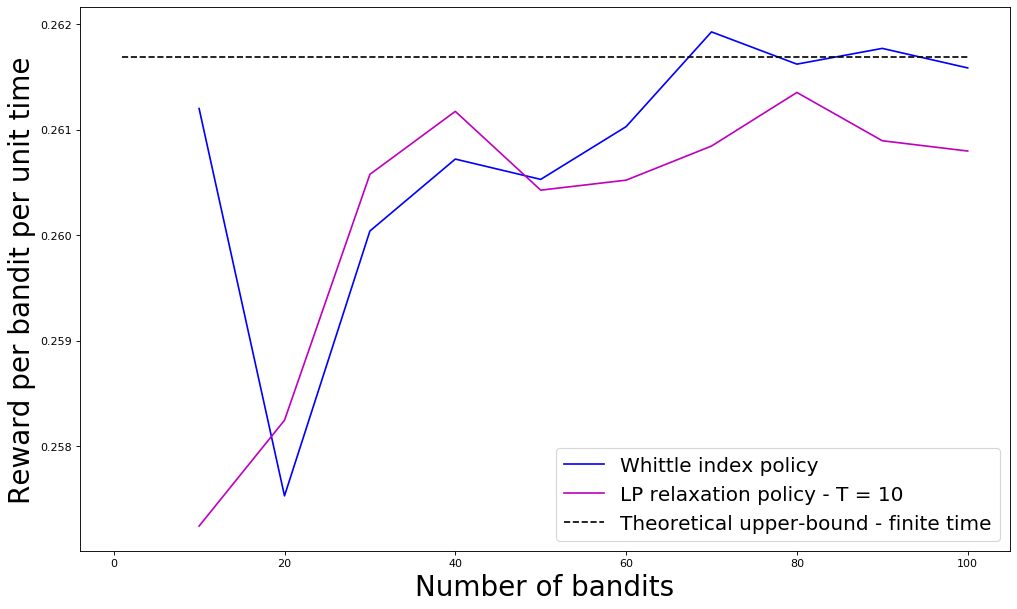

In [15]:
p2 = Problem(3, 50, alpha, 100, PR=[P0, P1, R0, R1], tau=1, time_exp=10, repeat_times = 20)
p2.plot_sim_nbbandits(whittle=True)


In [13]:
sum(x)

0.6000000000025022